# Donors choose data analysis

<h4><a id="about_data"></a></h4>

## Little History about Data Set

Founded in 2000 by a high school teacher in the Bronx, DonorsChoose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students. At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount.

## Answers to What and Why Questions on Data Set

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


<a id="first_part"></a>
## Importing required libraries

In [2]:
# numpy for easy numerical computations
import numpy as np
# pandas for dataframes and filterings
import pandas as pd
# sqlite3 library for performing operations on sqlite file
import sqlite3
# matplotlib for plotting graphs
import matplotlib.pyplot as plt
# seaborn library for easy plotting
import seaborn as sbrn
# warnings library for specific settings
import warnings
# regularlanguage for regex operations
import re
# For loading precomputed models
import pickle
# For loading natural language processing tool-kit
import nltk
# For calculating mathematical terms
import math

# For loading files from google drive
from google.colab import drive
# For working with files in google drive
drive.mount('/content/drive')
# tqdm for tracking progress of loops
from tqdm import tqdm_notebook as tqdm
# For creating dictionary of words
from collections import Counter
# For creating BagOfWords Model
from sklearn.feature_extraction.text import CountVectorizer
# For creating TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
# For standardizing values
from sklearn.preprocessing import StandardScaler
# For merging sparse matrices along row direction
from scipy.sparse import hstack
# For merging sparse matrices along column direction
from scipy.sparse import vstack
# For calculating TSNE values
from sklearn.manifold import TSNE
# For calculating the accuracy score on cross validate data
from sklearn.metrics import accuracy_score
# For performing the k-fold cross validation
from sklearn.model_selection import cross_val_score
# For splitting the data set into test and train data
from sklearn import model_selection
# For using decison tree classifier
from sklearn import tree
# For generating word cloud
from wordcloud import WordCloud
# For plotting decision tree
import graphviz
# For using svm classifer - hinge loss function of sgd
from sklearn import linear_model
# For creating samples for making dataset balanced
from sklearn.utils import resample
# For shuffling the dataframes
from sklearn.utils import shuffle
# For calculating roc_curve parameters
from sklearn.metrics import roc_curve
# For calculating auc value
from sklearn.metrics import auc
# For displaying results in table format
from prettytable import PrettyTable
# For generating confusion matrix
from sklearn.metrics import confusion_matrix
# For using gridsearch cv to find best parameter
from sklearn.model_selection import GridSearchCV
# For performing min-max standardization to features
from sklearn.preprocessing import MinMaxScaler
# For calculating sentiment score of the text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

warnings.filterwarnings('ignore')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Reading and Storing Data

In [0]:
projectsData = pd.read_csv('drive/My Drive/train_data.csv');
resourcesData = pd.read_csv('drive/My Drive/resources.csv');

In [4]:
projectsData.head(3)

Unnamed: 0  ... project_is_approved
0      160221  ...                   0
1      140945  ...                   1
2       21895  ...                   0

[3 rows x 17 columns]

In [5]:
projectsData.tail(3)

Unnamed: 0  ... project_is_approved
109245      143653  ...                   1
109246      164599  ...                   1
109247      128381  ...                   1

[3 rows x 17 columns]

In [6]:
resourcesData.head(3)

id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1    8.45

In [7]:
resourcesData.tail(3)

id  ... price
1541269  p031981  ...  8.99
1541270  p031981  ...  8.14
1541271  p031981  ...  7.39

[3 rows x 4 columns]

### Helper functions and classes

In [0]:
def equalsBorder(numberOfEqualSigns):
    """
    This function prints passed number of equal signs
    """
    print("="* numberOfEqualSigns);

In [0]:
# Citation link: https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [0]:
def printStyle(text, style):
    "This function prints text with the style passed to it"
    print(style + text + color.END);

### Shapes of projects data and resources data

In [11]:
printStyle("Number of data points in projects data: {}".format(projectsData.shape[0]), color.BOLD);
printStyle("Number of attributes in projects data:{}".format(projectsData.shape[1]), color.BOLD);
equalsBorder(60);
printStyle("Number of data points in resources data: {}".format(resourcesData.shape[0]), color.BOLD);
printStyle("Number of attributes in resources data: {}".format(resourcesData.shape[1]), color.BOLD);

Number of data points in projects data: 109248
Number of attributes in projects data:17
Number of data points in resources data: 1541272
Number of attributes in resources data: 4


In [0]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
def cleanCategories(subjectCategories):
    cleanedCategories = []
    for subjectCategory in tqdm(subjectCategories):
        tempCategory = ""
        for category in subjectCategory.split(","):
            if 'The' in category.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                category = category.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            category = category.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            tempCategory += category.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
            tempCategory = tempCategory.replace('&','_')
        cleanedCategories.append(tempCategory)
    return cleanedCategories

In [13]:
# projectDataWithCleanedCategories = pd.DataFrame(projectsData);
subjectCategories = list(projectsData.project_subject_categories);
cleanedCategories = cleanCategories(subjectCategories);
printStyle("Sample categories: ", color.BOLD);
equalsBorder(60);
print(subjectCategories[0:5]);
equalsBorder(60);
printStyle("Sample cleaned categories: ", color.BOLD);
equalsBorder(60);
print(cleanedCategories[0:5]);
projectsData['cleaned_categories'] = cleanedCategories;
projectsData.head(5)


Sample categories: 
['Literacy & Language', 'History & Civics, Health & Sports', 'Health & Sports', 'Literacy & Language, Math & Science', 'Math & Science']
Sample cleaned categories: 
['Literacy_Language ', 'History_Civics Health_Sports ', 'Health_Sports ', 'Literacy_Language Math_Science ', 'Math_Science ']


Unnamed: 0       id  ... project_is_approved               cleaned_categories
0      160221  p253737  ...                   0               Literacy_Language 
1      140945  p258326  ...                   1    History_Civics Health_Sports 
2       21895  p182444  ...                   0                   Health_Sports 
3          45  p246581  ...                   1  Literacy_Language Math_Science 
4      172407  p104768  ...                   1                    Math_Science 

[5 rows x 18 columns]

In [14]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
categoriesCounter = Counter()
for subjectCategory in projectsData.cleaned_categories.values:
    categoriesCounter.update(subjectCategory.split());
categoriesCounter

Counter({'AppliedLearning': 12135,
         'Care_Hunger': 1388,
         'Health_Sports': 14223,
         'History_Civics': 5914,
         'Literacy_Language': 52239,
         'Math_Science': 41421,
         'Music_Arts': 10293,
         'SpecialNeeds': 13642,
         'Warmth': 1388})

In [15]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
categoriesDictionary = dict(categoriesCounter);
sortedCategoriesDictionary = dict(sorted(categoriesDictionary.items(), key = lambda keyValue: keyValue[1]));
sortedCategoriesData = pd.DataFrame.from_dict(sortedCategoriesDictionary, orient='index');
sortedCategoriesData.columns = ['subject_categories'];
printStyle("Number of projects by Subject Categories: ", color.BOLD);
equalsBorder(60);
sortedCategoriesData

Number of projects by Subject Categories: 


subject_categories
Warmth                           1388
Care_Hunger                      1388
History_Civics                   5914
Music_Arts                      10293
AppliedLearning                 12135
SpecialNeeds                    13642
Health_Sports                   14223
Math_Science                    41421
Literacy_Language               52239

In [16]:
subjectSubCategories = projectsData.project_subject_subcategories;
cleanedSubCategories = cleanCategories(subjectSubCategories);
printStyle("Sample subject sub categories: ", color.BOLD);
equalsBorder(70);
print(subjectSubCategories[0:5]);
equalsBorder(70);
printStyle("Sample cleaned subject sub categories: ", color.BOLD);
equalsBorder(70);
print(cleanedSubCategories[0:5]);
projectsData['cleaned_sub_categories'] = cleanedSubCategories;


Sample subject sub categories: 
0                       ESL, Literacy
1    Civics & Government, Team Sports
2      Health & Wellness, Team Sports
3               Literacy, Mathematics
4                         Mathematics
Name: project_subject_subcategories, dtype: object
Sample cleaned subject sub categories: 
['ESL Literacy ', 'Civics_Government TeamSports ', 'Health_Wellness TeamSports ', 'Literacy Mathematics ', 'Mathematics ']


In [17]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
subjectsSubCategoriesCounter = Counter();
for subCategory in projectsData.cleaned_sub_categories:
    subjectsSubCategoriesCounter.update(subCategory.split());
subjectsSubCategoriesCounter

Counter({'AppliedSciences': 10816,
         'Care_Hunger': 1388,
         'CharacterEducation': 2065,
         'Civics_Government': 815,
         'College_CareerPrep': 2568,
         'CommunityService': 441,
         'ESL': 4367,
         'EarlyDevelopment': 4254,
         'Economics': 269,
         'EnvironmentalScience': 5591,
         'Extracurricular': 810,
         'FinancialLiteracy': 568,
         'ForeignLanguages': 890,
         'Gym_Fitness': 4509,
         'Health_LifeScience': 4235,
         'Health_Wellness': 10234,
         'History_Geography': 3171,
         'Literacy': 33700,
         'Literature_Writing': 22179,
         'Mathematics': 28074,
         'Music': 3145,
         'NutritionEducation': 1355,
         'Other': 2372,
         'ParentInvolvement': 677,
         'PerformingArts': 1961,
         'SocialSciences': 1920,
         'SpecialNeeds': 13642,
         'TeamSports': 2192,
         'VisualArts': 6278,
         'Warmth': 1388})

In [18]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
dictionarySubCategories = dict(subjectsSubCategoriesCounter);
sortedDictionarySubCategories = dict(sorted(dictionarySubCategories.items(), key = lambda keyValue: keyValue[1]));
sortedSubCategoriesData = pd.DataFrame.from_dict(sortedDictionarySubCategories, orient = 'index');
sortedSubCategoriesData.columns = ['subject_sub_categories']
printStyle("Number of projects sorted by subject sub categories: ", color.BOLD);
equalsBorder(70);
sortedSubCategoriesData

Number of projects sorted by subject sub categories: 


subject_sub_categories
Economics                                269
CommunityService                         441
FinancialLiteracy                        568
ParentInvolvement                        677
Extracurricular                          810
Civics_Government                        815
ForeignLanguages                         890
NutritionEducation                      1355
Warmth                                  1388
Care_Hunger                             1388
SocialSciences                          1920
PerformingArts                          1961
CharacterEducation                      2065
TeamSports                              2192
Other                                   2372
College_CareerPrep                      2568
Music                                   3145
History_Geography                       3171
Health_LifeScience                      4235
EarlyDevelopment                        4254
ESL                                     4367
Gym_Fitness                             4509
EnvironmentalScience                    5591
VisualArts                              6278
Health_Wellness                        10234
AppliedSciences                        10816
SpecialNeeds                           13642
Literature_Writing                     22179
Mathematics                            28074
Literacy                               33700

In [19]:
projectsData['project_essay'] = projectsData['project_essay_1'].map(str) + projectsData['project_essay_2'].map(str) + \
                                projectsData['project_essay_3'].map(str) + projectsData['project_essay_4'].map(str);
projectsData.head(5)

Unnamed: 0  ...                                      project_essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...
2       21895  ...  \r\n\"True champions aren't always the ones th...
3          45  ...  I work at a unique school filled with both ESL...
4      172407  ...  Our second grade classroom next year will be m...

[5 rows x 20 columns]

In [20]:
priceAndQuantityData = resourcesData.groupby('id').agg({'price': 'sum', 'quantity': 'sum'}).reset_index();
priceAndQuantityData.head(5)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98
4  p000005   485.99         8

In [21]:
projectsData.shape

(109248, 20)

In [22]:
projectsData = pd.merge(projectsData, priceAndQuantityData, on = 'id', how = 'left');
print(projectsData.shape);
projectsData.head(3)

(109248, 22)


Unnamed: 0       id  ...   price quantity
0      160221  p253737  ...  154.60       23
1      140945  p258326  ...  299.00        1
2       21895  p182444  ...  516.85       22

[3 rows x 22 columns]

In [23]:
projectsData[projectsData['id'] == 'p253737']

Unnamed: 0       id  ...  price quantity
0      160221  p253737  ...  154.6       23

[1 rows x 22 columns]

In [24]:
priceAndQuantityData[priceAndQuantityData['id'] == 'p253737']

id  price  quantity
253736  p253737  154.6        23

<a id="pre_processing_data"></a>
## Preprocessing data

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# All stopwords that are needed to be removed in the text
stopWords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]);
def preProcessingWithAndWithoutStopWords(texts):
    """
    This function takes list of texts and returns preprocessed list of texts one with
    stop words and one without stopwords.
    """
    # Variable for storing preprocessed text with stop words
    preProcessedTextsWithStopWords = [];
    # Variable for storing preprocessed text without stop words
    preProcessedTextsWithoutStopWords = [];
    
    # Looping over list of texts for performing pre processing
    for text in tqdm(texts, total = len(texts)):
        # Removing all links in the text
        text = re.sub(r"http\S+", "", text);

        # Removing all html tags in the text
        text = re.sub(r"<\w+/>", "", text);
        text = re.sub(r"<\w+>", "", text);
        
        # https://stackoverflow.com/a/47091490/4084039
        # Replacing all below words with adverbs
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"can\'t", "can not", text)
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)
        
        # Removing backslash symbols in text
        text = text.replace('\\r', ' ');
        text = text.replace('\\n', ' ');
        text = text.replace('\\"', ' ');
        
        # Removing all special characters of text
        text = re.sub(r"[^a-zA-Z0-9]+", " ", text);
        
        # Converting whole review text into lower case
        text = text.lower();
        
        # adding this preprocessed text without stopwords to list
        preProcessedTextsWithStopWords.append(text);
        
        # removing stop words from text
        textWithoutStopWords = ' '.join([word for word in text.split() if word not in stopWords]);
        # adding this preprocessed text without stopwords to list
        preProcessedTextsWithoutStopWords.append(textWithoutStopWords);

    return [preProcessedTextsWithStopWords, preProcessedTextsWithoutStopWords];

In [26]:
texts = [projectsData['project_essay'].values[0]]
preProcessedTextsWithStopWords, preProcessedTextsWithoutStopWords = preProcessingWithAndWithoutStopWords(texts);
print("Example project essay without pre-processing: ");
equalsBorder(70);
print(texts);
equalsBorder(70);
print("Example project essay with stop words and pre-processing: ");
equalsBorder(70);
print(preProcessedTextsWithStopWords);
equalsBorder(70);
print("Example project essay without stop words and pre-processing: ");
equalsBorder(70);
print(preProcessedTextsWithoutStopWords);


Example project essay without pre-processing: 
['My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \\r\\n\\r\\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\\"The limits of your language are the limits of your world.\\"-Ludwig Wittgenstein  Our English learner\'s have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\\r\

In [27]:
projectEssays = projectsData['project_essay'];
preProcessedEssaysWithStopWords, preProcessedEssaysWithoutStopWords = preProcessingWithAndWithoutStopWords(projectEssays);

In [28]:
preProcessedEssaysWithoutStopWords[0:3]

['students english learners working english second third languages melting pot refugees immigrants native born americans bringing gift language school 24 languages represented english learner program students every level mastery also 40 countries represented families within school student brings wealth knowledge experiences us open eyes new cultures beliefs respect limits language limits world ludwig wittgenstein english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills providing dvd players students able continue mastery english language even no one home able assist families students within level 1 proficiency status offered part program educational videos specially chosen english learner teacher sent home regularly watch videos help child develop early reading skills parents not access dvd player opportunity check dvd 

In [29]:
projectTitles = projectsData['project_title'];
preProcessedProjectTitlesWithStopWords, preProcessedProjectTitlesWithoutStopWords = preProcessingWithAndWithoutStopWords(projectTitles);
preProcessedProjectTitlesWithoutStopWords[0:5]

['educational support english learners home',
 'wanted projector hungry learners',
 'soccer equipment awesome middle school students',
 'techie kindergarteners',
 'interactive math tools']

In [30]:
projectsData['preprocessed_titles'] = preProcessedProjectTitlesWithoutStopWords;
projectsData['preprocessed_essays'] = preProcessedEssaysWithoutStopWords;
projectsData.shape

(109248, 24)

## Preparing data for classification and modelling

In [31]:
pd.DataFrame(projectsData.columns, columns = ['All features in projects data'])

All features in projects data
0                                     Unnamed: 0
1                                             id
2                                     teacher_id
3                                 teacher_prefix
4                                   school_state
5                     project_submitted_datetime
6                         project_grade_category
7                     project_subject_categories
8                  project_subject_subcategories
9                                  project_title
10                               project_essay_1
11                               project_essay_2
12                               project_essay_3
13                               project_essay_4
14                      project_resource_summary
15  teacher_number_of_previously_posted_projects
16                           project_is_approved
17                            cleaned_categories
18                        cleaned_sub_categories
19                                 project_essay
20                                         price
21                                      quantity
22                           preprocessed_titles
23                           preprocessed_essays

### Useful features:
#### Here we will consider only below features for classification and we can ignore the other features

##### Categorical data:
1. <b>school_state</b> - categorical data
2. <b>project_grade_category</b> - categorical data
3. <b>cleaned_categories</b> - categorical data
4. <b>cleaned_sub_categories</b> - categorical data
5. <b>teacher_prefix</b> - categorical data

##### Text data:
1. <b>project_resource_summary</b> - text data
2. <b>project_title - text data</b>
3. <b>project_resource_summary</b> - text data

##### Numerical data:
1. <b>teacher_number_of_previously_posted_projects</b> - numerical data
2. <b>price</b> - numerical data
3. <b>quantity</b> - numerical data

<a id="classification_using_support_vector_machine"></a>
# Classification & Modelling using decision trees

<a id="classification_on_data_using_support_vector_machine"></a>
<h2><font color="green">Classification using data by decision trees</font></h2>

<h3><font color='blue'>Splitting Data(Only training and test)</font></h3>

In [32]:
projectsData = projectsData.dropna(subset = ['teacher_prefix']);
projectsData.shape

(109245, 24)

In [33]:
classesData = projectsData['project_is_approved']
print(classesData.shape)

(109245,)


In [0]:
trainingData, testData, classesTraining, classesTest = model_selection.train_test_split(projectsData, classesData, test_size =  0.3, random_state = 44, stratify = classesData);
trainingData, crossValidateData, classesTraining, classesCrossValidate = model_selection.train_test_split(trainingData, classesTraining, test_size = 0.3, random_state = 0, stratify = classesTraining);

In [35]:
print("Shapes of splitted data: ");
equalsBorder(70);

print("testData shape: ", testData.shape);
print("classesTest: ", classesTest.shape);
print("trainingData shape: ", trainingData.shape);
print("classesTraining shape: ", classesTraining.shape);

Shapes of splitted data: 
testData shape:  (32774, 24)
classesTest:  (32774,)
trainingData shape:  (53529, 24)
classesTraining shape:  (53529,)


In [36]:
print("Number of negative points: ", trainingData[trainingData['project_is_approved'] == 0].shape);
print("Number of positive points: ", trainingData[trainingData['project_is_approved'] == 1].shape);

Number of negative points:  (8105, 24)
Number of positive points:  (45424, 24)


In [0]:
vectorizedFeatureNames = [];

## Vectorizing categorical data

### 1. Vectorizing cleaned_categories(project_subject_categories cleaned) - One Hot Encoding

In [0]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_categories
subjectsCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedCategoriesDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_categories values
subjectsCategoriesVectorizer.fit(trainingData['cleaned_categories'].values);
# Vectorizing categories using one-hot-encoding
categoriesVectors = subjectsCategoriesVectorizer.transform(trainingData['cleaned_categories'].values);

In [39]:
print("Features used in vectorizing categories: ");
equalsBorder(70);
print(subjectsCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", categoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(categoriesVectors[0:4])

Features used in vectorizing categories: 
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (53529, 9)
Sample vectors of categories: 
  (0, 0)	1
  (0, 1)	1
  (1, 8)	1
  (2, 7)	1
  (3, 7)	1


### 2. Vectorizing cleaned_sub_categories(project_subject_sub_categories cleaned) - One Hot Encoding

In [0]:
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique cleaned_sub_categories
subjectsSubCategoriesVectorizer = CountVectorizer(vocabulary = list(sortedDictionarySubCategories.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with cleaned_sub_categories values
subjectsSubCategoriesVectorizer.fit(trainingData['cleaned_sub_categories'].values);
# Vectorizing sub categories using one-hot-encoding
subCategoriesVectors = subjectsSubCategoriesVectorizer.transform(trainingData['cleaned_sub_categories'].values);

In [41]:
print("Features used in vectorizing subject sub categories: ");
equalsBorder(70);
print(subjectsSubCategoriesVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of cleaned_categories matrix after vectorization(one-hot-encoding): ", subCategoriesVectors.shape);
equalsBorder(70);
print("Sample vectors of categories: ");
equalsBorder(70);
print(subCategoriesVectors[0:4])

Features used in vectorizing subject sub categories: 
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of cleaned_categories matrix after vectorization(one-hot-encoding):  (53529, 30)
Sample vectors of categories: 
  (0, 8)	1
  (0, 9)	1
  (1, 29)	1
  (2, 28)	1
  (3, 28)	1


### 3. Vectorizing teacher_prefix - One Hot Encoding

In [0]:
def giveCounter(data):
    counter = Counter();
    for dataValue in data:
        counter.update(str(dataValue).split());
    return counter

In [43]:
giveCounter(trainingData['teacher_prefix'].values)

Counter({'Dr.': 9, 'Mr.': 5268, 'Mrs.': 28095, 'Ms.': 19006, 'Teacher': 1151})

In [0]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [45]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:100]);

Features used in vectorizing teacher_prefix: 
['Ms.', 'Teacher', 'Mrs.', 'Mr.', 'Dr.']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (53529, 5)
Sample vectors of teacher_prefix: 
  (3, 1)	1
  (4, 1)	1


In [46]:
teacherPrefixes = [prefix.replace('.', '') for prefix in trainingData['teacher_prefix'].values];
teacherPrefixes[0:5]

['Ms', 'Ms', 'Ms', 'Teacher', 'Teacher']

In [47]:
trainingData['teacher_prefix'] = teacherPrefixes;
trainingData.head(3)

Unnamed: 0  ...                                preprocessed_essays
48858      140830  ...  lot students not get lot attention outside sch...
37065      172594  ...  students creators researchers role models writ...
38285      116819  ...  program teach created help students held back ...

[3 rows x 24 columns]

In [0]:
teacherPrefixDictionary = dict(giveCounter(trainingData['teacher_prefix'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique teacher_prefix
teacherPrefixVectorizer = CountVectorizer(vocabulary = list(teacherPrefixDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with teacher_prefix values
teacherPrefixVectorizer.fit(trainingData['teacher_prefix'].values);
# Vectorizing teacher_prefix using one-hot-encoding
teacherPrefixVectors = teacherPrefixVectorizer.transform(trainingData['teacher_prefix'].values);

In [49]:
print("Features used in vectorizing teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of teacher_prefix matrix after vectorization(one-hot-encoding): ", teacherPrefixVectors.shape);
equalsBorder(70);
print("Sample vectors of teacher_prefix: ");
equalsBorder(70);
print(teacherPrefixVectors[0:4]);

Features used in vectorizing teacher_prefix: 
['Ms', 'Teacher', 'Mrs', 'Mr', 'Dr']
Shape of teacher_prefix matrix after vectorization(one-hot-encoding):  (53529, 5)
Sample vectors of teacher_prefix: 
  (0, 0)	1
  (1, 0)	1
  (2, 0)	1
  (3, 1)	1


### 4. Vectorizing school_state - One Hot Encoding

In [0]:
schoolStateDictionary = dict(giveCounter(trainingData['school_state'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique school states
schoolStateVectorizer = CountVectorizer(vocabulary = list(schoolStateDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with school_state values
schoolStateVectorizer.fit(trainingData['school_state'].values);
# Vectorizing school_state using one-hot-encoding
schoolStateVectors = schoolStateVectorizer.transform(trainingData['school_state'].values);

In [51]:
print("Features used in vectorizing school_state: ");
equalsBorder(70);
print(schoolStateVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", schoolStateVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(schoolStateVectors[0:4]);

Features used in vectorizing school_state: 
['FL', 'DE', 'TX', 'WV', 'PA', 'NJ', 'WA', 'AR', 'IA', 'CA', 'NH', 'NV', 'LA', 'MD', 'GA', 'AZ', 'NC', 'AL', 'OK', 'AK', 'NY', 'IL', 'VA', 'MA', 'OR', 'SC', 'MO', 'RI', 'IN', 'HI', 'MI', 'OH', 'TN', 'CO', 'WY', 'MN', 'UT', 'ME', 'WI', 'MT', 'KY', 'SD', 'NM', 'KS', 'CT', 'MS', 'NE', 'DC', 'ND', 'ID', 'VT']
Shape of school_state matrix after vectorization(one-hot-encoding):  (53529, 51)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 1)	1
  (2, 2)	1
  (3, 3)	1


### 5. Vectorizing project_grade_category - One Hot Encoding

In [52]:
giveCounter(trainingData['project_grade_category'])

Counter({'3-5': 18284,
         '6-8': 8161,
         '9-12': 5424,
         'Grades': 53529,
         'PreK-2': 21660})

In [53]:
cleanedGrades = []
for grade in trainingData['project_grade_category'].values:
    grade = grade.replace(' ', '');
    grade = grade.replace('-', 'to');
    cleanedGrades.append(grade);
cleanedGrades[0:4]

['Grades3to5', 'Grades3to5', 'Grades6to8', 'Grades6to8']

In [54]:
trainingData['project_grade_category'] = cleanedGrades
trainingData.head(4)

Unnamed: 0  ...                                preprocessed_essays
48858       140830  ...  lot students not get lot attention outside sch...
37065       172594  ...  students creators researchers role models writ...
38285       116819  ...  program teach created help students held back ...
102612       48244  ...  math teacher first day school got lot hate mat...

[4 rows x 24 columns]

In [0]:
projectGradeDictionary = dict(giveCounter(trainingData['project_grade_category'].values));
# Using CountVectorizer for performing one-hot-encoding by setting vocabulary as list of all unique project grade categories
projectGradeVectorizer = CountVectorizer(vocabulary = list(projectGradeDictionary.keys()), lowercase = False, binary = True);
# Fitting CountVectorizer with project_grade_category values
projectGradeVectorizer.fit(trainingData['project_grade_category'].values);
# Vectorizing project_grade_category using one-hot-encoding
projectGradeVectors = projectGradeVectorizer.transform(trainingData['project_grade_category'].values);

In [56]:
print("Features used in vectorizing project_grade_category: ");
equalsBorder(70);
print(projectGradeVectorizer.get_feature_names());
equalsBorder(70);
print("Shape of school_state matrix after vectorization(one-hot-encoding): ", projectGradeVectors.shape);
equalsBorder(70);
print("Sample vectors of school_state: ");
equalsBorder(70);
print(projectGradeVectors[0:4]);

Features used in vectorizing project_grade_category: 
['Grades3to5', 'Grades6to8', 'GradesPreKto2', 'Grades9to12']
Shape of school_state matrix after vectorization(one-hot-encoding):  (53529, 4)
Sample vectors of school_state: 
  (0, 0)	1
  (1, 0)	1
  (2, 1)	1
  (3, 1)	1


<a id="vectorizing_features"></a>
## Vectorizing Text Data

In [57]:
preProcessedEssaysWithStopWords, preProcessedEssaysWithoutStopWords = preProcessingWithAndWithoutStopWords(trainingData['project_essay']);
preProcessedProjectTitlesWithStopWords, preProcessedProjectTitlesWithoutStopWords = preProcessingWithAndWithoutStopWords(trainingData['project_title']);

In [0]:
bagOfWordsVectorizedFeatures = [];

### Bag of Words

#### 1. Vectorizing project_essay

In [0]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project essays
bowEssayVectorizer = CountVectorizer(min_df = 10, max_features = 5000);
# Transforming the preprocessed essays to bag of words vectors
bowEssayModel = bowEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [60]:
print("Some of the Features used in vectorizing preprocessed essays: ");
equalsBorder(70);
print(bowEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed essay matrix after vectorization: ", bowEssayModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed essay: ");
equalsBorder(70);
print(bowEssayModel[0])

Some of the Features used in vectorizing preprocessed essays: 
['worries', 'worry', 'worrying', 'worst', 'worth', 'worthwhile', 'worthy', 'would', 'wow', 'write', 'writer', 'writers', 'writing', 'writings', 'written', 'wrong', 'wrote', 'xylophones', 'yard', 'year', 'yearbook', 'yearly', 'yearn', 'yearning', 'years', 'yes', 'yesterday', 'yet', 'yoga', 'york', 'young', 'younger', 'youngest', 'youth', 'youtube', 'zero', 'zest', 'zip', 'zone', 'zoo']
Shape of preprocessed essay matrix after vectorization:  (53529, 5000)
Sample bag-of-words vector of preprocessed essay: 
  (0, 2747)	2
  (0, 4365)	10
  (0, 3100)	9
  (0, 2036)	1
  (0, 395)	1
  (0, 3220)	1
  (0, 3960)	6
  (0, 4907)	1
  (0, 2641)	1
  (0, 1676)	2
  (0, 615)	1
  (0, 2979)	1
  (0, 4456)	1
  (0, 2686)	1
  (0, 3890)	1
  (0, 4967)	8
  (0, 2754)	1
  (0, 4479)	1
  (0, 3580)	2
  (0, 3821)	2
  (0, 3045)	2
  (0, 4390)	1
  (0, 1989)	1
  (0, 250)	1
  (0, 3066)	1
  :	:
  (0, 3256)	1
  (0, 571)	1
  (0, 437)	1
  (0, 4191)	1
  (0, 4873)	1
  (0,

#### 2. Vectorizing project_title

In [0]:
# Initializing countvectorizer for bag of words vectorization of preprocessed project titles
bowTitleVectorizer = CountVectorizer(min_df = 10);
# Transforming the preprocessed project titles to bag of words vectors
bowTitleModel = bowTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWords);

In [62]:
print("Some of the Features used in vectorizing preprocessed titles: ");
equalsBorder(70);
print(bowTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after vectorization: ", bowTitleModel.shape);
equalsBorder(70);
print("Sample bag-of-words vector of preprocessed title: ");
equalsBorder(70);
print(bowTitleModel[0])

Some of the Features used in vectorizing preprocessed titles: 
['wish', 'within', 'without', 'wizards', 'wo', 'wobble', 'wobbles', 'wobbling', 'wobbly', 'wonder', 'wonderful', 'wonders', 'word', 'words', 'work', 'workers', 'working', 'workout', 'works', 'workshop', 'world', 'worlds', 'worms', 'worth', 'would', 'wow', 'wrestling', 'write', 'writer', 'writers', 'writing', 'written', 'ye', 'year', 'yearbook', 'yes', 'yoga', 'young', 'youth', 'zone']
Shape of preprocessed title matrix after vectorization:  (53529, 2105)
Sample bag-of-words vector of preprocessed title: 
  (0, 127)	1


### Tf-Idf Vectorization

#### 1. Vectorizing project_essay

In [0]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project essays
tfIdfEssayVectorizer = TfidfVectorizer(min_df = 10, max_features = 5000);
# Transforming the preprocessed project essays to tf-idf vectors
tfIdfEssayModel = tfIdfEssayVectorizer.fit_transform(preProcessedEssaysWithoutStopWords);

In [64]:
print("Some of the Features used in tf-idf vectorizing preprocessed essays: ");
equalsBorder(70);
print(tfIdfEssayVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfEssayModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed essay: ");
equalsBorder(70);
print(tfIdfEssayModel[0])

Some of the Features used in tf-idf vectorizing preprocessed essays: 
['worries', 'worry', 'worrying', 'worst', 'worth', 'worthwhile', 'worthy', 'would', 'wow', 'write', 'writer', 'writers', 'writing', 'writings', 'written', 'wrong', 'wrote', 'xylophones', 'yard', 'year', 'yearbook', 'yearly', 'yearn', 'yearning', 'years', 'yes', 'yesterday', 'yet', 'yoga', 'york', 'young', 'younger', 'youngest', 'youth', 'youtube', 'zero', 'zest', 'zip', 'zone', 'zoo']
Shape of preprocessed title matrix after tf-idf vectorization:  (53529, 5000)
Sample Tf-Idf vector of preprocessed essay: 
  (0, 3022)	0.018094205612536794
  (0, 4388)	0.054207619003056214
  (0, 3991)	0.12495528339505618
  (0, 2795)	0.05826650257254188
  (0, 2547)	0.07602232720617802
  (0, 3519)	0.11547298391896377
  (0, 2542)	0.04910401209544946
  (0, 4003)	0.08690283700318722
  (0, 438)	0.08767512357315305
  (0, 3393)	0.09389789515024273
  (0, 900)	0.06949010829630545
  (0, 4016)	0.09458467882329553
  (0, 4752)	0.03083134772248111
  (

#### 2. Vectorizing project_title

In [0]:
# Intializing tfidf vectorizer for tf-idf vectorization of preprocessed project titles
tfIdfTitleVectorizer = TfidfVectorizer(min_df = 10);
# Transforming the preprocessed project titles to tf-idf vectors
tfIdfTitleModel = tfIdfTitleVectorizer.fit_transform(preProcessedProjectTitlesWithoutStopWords);

In [66]:
print("Some of the Features used in tf-idf vectorizing preprocessed titles: ");
equalsBorder(70);
print(tfIdfTitleVectorizer.get_feature_names()[-40:]);
equalsBorder(70);
print("Shape of preprocessed title matrix after tf-idf vectorization: ", tfIdfTitleModel.shape);
equalsBorder(70);
print("Sample Tf-Idf vector of preprocessed title: ");
equalsBorder(70);
print(tfIdfTitleModel[0])

Some of the Features used in tf-idf vectorizing preprocessed titles: 
['wish', 'within', 'without', 'wizards', 'wo', 'wobble', 'wobbles', 'wobbling', 'wobbly', 'wonder', 'wonderful', 'wonders', 'word', 'words', 'work', 'workers', 'working', 'workout', 'works', 'workshop', 'world', 'worlds', 'worms', 'worth', 'would', 'wow', 'wrestling', 'write', 'writer', 'writers', 'writing', 'written', 'ye', 'year', 'yearbook', 'yes', 'yoga', 'young', 'youth', 'zone']
Shape of preprocessed title matrix after tf-idf vectorization:  (53529, 2105)
Sample Tf-Idf vector of preprocessed title: 
  (0, 127)	1.0


### Average Word2Vector Vectorization

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# We should have glove_vectors file for creating below model
with open('drive/My Drive/glove_vectors', 'rb') as f:
    gloveModel = pickle.load(f)
    gloveWords =  set(gloveModel.keys())

In [68]:
print("Glove vector of sample word: ");
equalsBorder(70);
print(gloveModel['technology']);
equalsBorder(70);
print("Shape of glove vector: ", gloveModel['technology'].shape);

Glove vector of sample word: 
[-0.26078   -0.36898   -0.022831   0.21666    0.16672   -0.20268
 -3.1219     0.33057    0.71512    0.28874    0.074368  -0.033203
  0.23783    0.21052    0.076562   0.13007   -0.31706   -0.45888
 -0.45463   -0.13191    0.49761    0.072704   0.16811    0.18846
 -0.16688   -0.21973    0.08575   -0.19577   -0.2101    -0.32436
 -0.56336    0.077996  -0.22758   -0.66569    0.14824    0.038945
  0.50881   -0.1352     0.49966   -0.4401    -0.022335  -0.22744
  0.22086    0.21865    0.36647    0.30495   -0.16565    0.038759
  0.28108   -0.2167     0.12453    0.65401    0.34584   -0.2557
 -0.046363  -0.31111   -0.020936  -0.17122   -0.77114    0.29289
 -0.14625    0.39541   -0.078938   0.051127   0.15076    0.085126
  0.183     -0.06755    0.26312    0.0087276  0.0066415  0.37033
  0.03496   -0.12627   -0.052626  -0.34897    0.14672    0.14799
 -0.21821   -0.042785   0.2661    -1.1105     0.31789    0.27278
  0.054468  -0.27458    0.42732   -0.44101   -0.19302   -

In [0]:
def getWord2VecVectors(texts):
    word2VecTextsVectors = [];
    for preProcessedText in tqdm(texts):
        word2VecTextVector = np.zeros(300);
        numberOfWordsInText = 0;
        for word in preProcessedText.split():
            if word in gloveWords:
                word2VecTextVector += gloveModel[word];
                numberOfWordsInText += 1;
        if numberOfWordsInText != 0:
            word2VecTextVector = word2VecTextVector / numberOfWordsInText;
        word2VecTextsVectors.append(word2VecTextVector);
    return word2VecTextsVectors;

#### 1. Vectorizing project_essay

In [70]:
word2VecEssaysVectors = getWord2VecVectors(preProcessedEssaysWithoutStopWords);

In [71]:
print("Shape of Word2Vec vectorization matrix of essays: {},{}".format(len(word2VecEssaysVectors), len(word2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample essay: ");
equalsBorder(70);
print(word2VecEssaysVectors[0]);

Shape of Word2Vec vectorization matrix of essays: 53529,300
Sample essay: 
lot students not get lot attention outside school willing learn excited school students bright motivated talent light room would love teacher provide resources need successful future students always excited new activities would not able home would like provide opportunities school would not able experience home half school students receive free reduced cost lunches happens weekends children not school not anything eat home would go without school noticing unusual trend among students free lunch program growing number conserving food fridays students hoarding food almost like animals eating half sticking rest pants book bag would something eat weekend simply not resources house students looking resource would not go without backpack blessing program sends home food students weekends not go without backpacks use send food home students lately food comes home plastic bags not seem like students would able keep need

#### 2. Vectorizing project_title

In [72]:
word2VecTitlesVectors = getWord2VecVectors(preProcessedProjectTitlesWithoutStopWords);

In [73]:
print("Shape of Word2Vec vectorization matrix of project titles: {}, {}".format(len(word2VecTitlesVectors), len(word2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Word2Vec vector of sample title: ");
equalsBorder(70);
print(word2VecTitlesVectors[0]);

Shape of Word2Vec vectorization matrix of project titles: 53529, 300
Sample title: 
backpack blessing
Word2Vec vector of sample title: 
[ 0.321755   -0.032325    0.20554    -0.600965   -0.07439    -0.001725
 -1.5139     -0.013643   -0.381111   -0.34155     0.301139   -0.32066
  0.2462865  -0.415415    0.08197     0.0296465   0.26638     0.3739
  0.1336645   0.26477     0.507595    0.1300295   0.1349275   0.357985
  0.0574315   0.0829305  -0.25652     0.660165    0.150822    0.444865
 -0.3268345  -0.0447      0.06186     0.25688     0.44128    -0.075689
 -0.23253    -0.187925    0.410855   -0.12419     0.02233    -0.045325
 -0.1647205   0.2246      0.32102    -0.12459     0.133932   -0.21097
 -0.057329   -0.033065    0.017981    0.012177    0.382856   -0.0979925
  0.199735   -0.265595   -0.017795   -0.146825    0.115415   -0.570505
 -0.180215   -0.3856425  -0.286265   -0.22614    -0.296295    0.365795
 -0.0152215   0.143773    0.41466     0.252065    0.010353    0.08573
 -0.140455    0.

### Tf-Idf Weighted Word2Vec Vectorization

#### 1. Vectorizing project_essay

In [0]:
# Initializing tfidf vectorizer
tfIdfEssayTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed essays using tfidf vectorizer initialized above 
tfIdfEssayTempVectorizer.fit(preProcessedEssaysWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfEssayDictionary = dict(zip(tfIdfEssayTempVectorizer.get_feature_names(), list(tfIdfEssayTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfEssayWords = set(tfIdfEssayTempVectorizer.get_feature_names());

In [75]:
# Creating list to save tf-idf weighted vectors of essays
tfIdfWeightedWord2VecEssaysVectors = [];
# Iterating over each essay
for essay in tqdm(preProcessedEssaysWithoutStopWords):
    # Sum of tf-idf values of all words in a particular essay
    cumulativeSumTfIdfWeightOfEssay = 0;
    # Tf-Idf weighted word2vec vector of a particular essay
    tfIdfWeightedWord2VecEssayVector = np.zeros(300);
    # Splitting essay into list of words
    splittedEssay = essay.split();
    # Iterating over each word
    for word in splittedEssay:
        # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
        if (word in gloveWords) and (word in tfIdfEssayWords):
            # Tf-Idf value of particular word in essay
            tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfEssay != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
    # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
    tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);

In [76]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: {}, {}".format(len(tfIdfWeightedWord2VecEssaysVectors), len(tfIdfWeightedWord2VecEssaysVectors[0])));
equalsBorder(70);
print("Sample Essay: ");
equalsBorder(70);
print(preProcessedEssaysWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample essay: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecEssaysVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project essays: 53529, 300
Sample Essay: 
lot students not get lot attention outside school willing learn excited school students bright motivated talent light room would love teacher provide resources need successful future students always excited new activities would not able home would like provide opportunities school would not able experience home half school students receive free reduced cost lunches happens weekends children not school not anything eat home would go without school noticing unusual trend among students free lunch program growing number conserving food fridays students hoarding food almost like animals eating half sticking rest pants book bag would something eat weekend simply not resources house students looking resource would not go without backpack blessing program sends home food students weekends not go without backpacks use send food home students lately food comes home plastic bags not seem like stud

#### 2. Vectorizing project_title

In [0]:
# Initializing tfidf vectorizer
tfIdfTitleTempVectorizer = TfidfVectorizer();
# Vectorizing preprocessed titles using tfidf vectorizer initialized above 
tfIdfTitleTempVectorizer.fit(preProcessedProjectTitlesWithoutStopWords);
# Saving dictionary in which each word is key and it's idf is value
tfIdfTitleDictionary = dict(zip(tfIdfTitleTempVectorizer.get_feature_names(), list(tfIdfTitleTempVectorizer.idf_)));
# Creating set of all unique words used by tfidf vectorizer
tfIdfTitleWords = set(tfIdfTitleTempVectorizer.get_feature_names());

In [78]:
# Creating list to save tf-idf weighted vectors of project titles
tfIdfWeightedWord2VecTitlesVectors = [];
# Iterating over each title
for title in tqdm(preProcessedProjectTitlesWithoutStopWords):
    # Sum of tf-idf values of all words in a particular project title
    cumulativeSumTfIdfWeightOfTitle = 0;
    # Tf-Idf weighted word2vec vector of a particular project title
    tfIdfWeightedWord2VecTitleVector = np.zeros(300);
    # Splitting title into list of words
    splittedTitle = title.split();
    # Iterating over each word
    for word in splittedTitle:
        # Checking if word is in glove words and set of words used by tfIdf title vectorizer
        if (word in gloveWords) and (word in tfIdfTitleWords):
            # Tf-Idf value of particular word in title
            tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
            # Making tf-idf weighted word2vec
            tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
            # Summing tf-idf weight of word to cumulative sum
            cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
    if cumulativeSumTfIdfWeightOfTitle != 0:
        # Taking average of sum of vectors with tf-idf cumulative sum
        tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
    # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);

In [79]:
print("Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: {}, {}".format(len(tfIdfWeightedWord2VecTitlesVectors), len(tfIdfWeightedWord2VecTitlesVectors[0])));
equalsBorder(70);
print("Sample Title: ");
equalsBorder(70);
print(preProcessedProjectTitlesWithoutStopWords[0]);
equalsBorder(70);
print("Tf-Idf Weighted Word2Vec vector of sample title: ");
equalsBorder(70);
print(tfIdfWeightedWord2VecTitlesVectors[0]);

Shape of Tf-Idf weighted Word2Vec vectorization matrix of project titles: 53529, 300
Sample Title: 
backpack blessing
Tf-Idf Weighted Word2Vec vector of sample title: 
[ 2.50718268e-01 -6.78771436e-02  1.64945903e-01 -5.58781892e-01
 -1.57515554e-01  2.84074698e-02 -1.56501858e+00 -4.22254254e-03
 -3.41084483e-01 -3.32777248e-01  2.55680825e-01 -2.95874949e-01
  2.25708247e-01 -4.39503940e-01  5.08571015e-02  1.84672039e-02
  2.55236361e-01  3.44834899e-01  1.38834573e-01  3.15915601e-01
  5.32437032e-01  1.48715861e-01  1.56665232e-01  3.55325683e-01
  6.66728486e-02  9.02252070e-02 -3.47335076e-01  6.22555660e-01
  1.37913942e-01  4.43856374e-01 -3.54948602e-01 -7.44582738e-02
  3.72923004e-02  2.64479057e-01  4.40914616e-01 -9.30019969e-02
 -1.93378643e-01 -1.85749729e-01  3.86529911e-01 -1.54445244e-01
  5.08288135e-02 -1.67128115e-02 -1.34640371e-01  2.18770297e-01
  2.99576279e-01 -1.26725913e-01  1.40386499e-01 -1.98682038e-01
 -6.87065553e-02 -9.17226300e-03  3.15835235e-02  3.

<h3><font color="green">Method for vectorizing unknown essays using our training data tf-idf weighted model</font></h3>

In [0]:
def getAvgTfIdfEssayVectors(arrayOfTexts):
    # Creating list to save tf-idf weighted vectors of essays
    tfIdfWeightedWord2VecEssaysVectors = [];
    # Iterating over each essay
    for essay in tqdm(arrayOfTexts):
        # Sum of tf-idf values of all words in a particular essay
        cumulativeSumTfIdfWeightOfEssay = 0;
        # Tf-Idf weighted word2vec vector of a particular essay
        tfIdfWeightedWord2VecEssayVector = np.zeros(300);
        # Splitting essay into list of words
        splittedEssay = essay.split();
        # Iterating over each word
        for word in splittedEssay:
            # Checking if word is in glove words and set of words used by tfIdf essay vectorizer
            if (word in gloveWords) and (word in tfIdfEssayWords):
                # Tf-Idf value of particular word in essay
                tfIdfValueWord = tfIdfEssayDictionary[word] * (essay.count(word) / len(splittedEssay));
                # Making tf-idf weighted word2vec
                tfIdfWeightedWord2VecEssayVector += tfIdfValueWord * gloveModel[word];
                # Summing tf-idf weight of word to cumulative sum
                cumulativeSumTfIdfWeightOfEssay += tfIdfValueWord;
        if cumulativeSumTfIdfWeightOfEssay != 0:
            # Taking average of sum of vectors with tf-idf cumulative sum
            tfIdfWeightedWord2VecEssayVector = tfIdfWeightedWord2VecEssayVector / cumulativeSumTfIdfWeightOfEssay;
        # Appending the above calculated tf-idf weighted vector of particular essay to list of vectors of essays
        tfIdfWeightedWord2VecEssaysVectors.append(tfIdfWeightedWord2VecEssayVector);
    return tfIdfWeightedWord2VecEssaysVectors;

<h3><font color="green">Method for vectorizing unknown titles using our training data tf-idf weighted model</font></h3>

In [0]:
def getAvgTfIdfTitleVectors(arrayOfTexts):
    # Creating list to save tf-idf weighted vectors of project titles
    tfIdfWeightedWord2VecTitlesVectors = [];
    # Iterating over each title
    for title in tqdm(arrayOfTexts):
        # Sum of tf-idf values of all words in a particular project title
        cumulativeSumTfIdfWeightOfTitle = 0;
        # Tf-Idf weighted word2vec vector of a particular project title
        tfIdfWeightedWord2VecTitleVector = np.zeros(300);
        # Splitting title into list of words
        splittedTitle = title.split();
        # Iterating over each word
        for word in splittedTitle:
            # Checking if word is in glove words and set of words used by tfIdf title vectorizer
            if (word in gloveWords) and (word in tfIdfTitleWords):
                # Tf-Idf value of particular word in title
                tfIdfValueWord = tfIdfTitleDictionary[word] * (title.count(word) / len(splittedTitle));
                # Making tf-idf weighted word2vec
                tfIdfWeightedWord2VecTitleVector += tfIdfValueWord * gloveModel[word];
                # Summing tf-idf weight of word to cumulative sum
                cumulativeSumTfIdfWeightOfTitle += tfIdfValueWord;
        if cumulativeSumTfIdfWeightOfTitle != 0:
            # Taking average of sum of vectors with tf-idf cumulative sum
            tfIdfWeightedWord2VecTitleVector = tfIdfWeightedWord2VecTitleVector / cumulativeSumTfIdfWeightOfTitle;
        # Appending the above calculated tf-idf weighted vector of particular title to list of vectors of project titles
        tfIdfWeightedWord2VecTitlesVectors.append(tfIdfWeightedWord2VecTitleVector);
    return tfIdfWeightedWord2VecTitlesVectors;

### Vectorizing numerical features

#### 1. Vectorizing price

In [0]:
# Standardizing the price data using StandardScaler(Uses mean and std for standardization)
priceScaler = MinMaxScaler();
priceScaler.fit(trainingData['price'].values.reshape(-1, 1));
priceStandardized = priceScaler.transform(trainingData['price'].values.reshape(-1, 1));

In [83]:
print("Shape of standardized matrix of prices: ", priceStandardized.shape);
equalsBorder(70);
print("Sample original prices: ");
equalsBorder(70);
print(trainingData['price'].values[0:5]);
print("Sample standardized prices: ");
equalsBorder(70);
print(priceStandardized[0:5]);

Shape of standardized matrix of prices:  (53529, 1)
Sample original prices: 
[112.78 104.35  84.39  94.73  11.02]
Sample standardized prices: 
[[0.01121089]
 [0.01036775]
 [0.00837141]
 [0.00940559]
 [0.00103317]]


#### 2. Vectorizing quantity

In [0]:
# Standardizing the quantity data using StandardScaler(Uses mean and std for standardization)
quantityScaler = MinMaxScaler();
quantityScaler.fit(trainingData['quantity'].values.reshape(-1, 1));
quantityStandardized = quantityScaler.transform(trainingData['quantity'].values.reshape(-1, 1));

In [85]:
print("Shape of standardized matrix of quantities: ", quantityStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['quantity'].values[0:5]);
print("Sample standardized quantities: ");
equalsBorder(70);
print(quantityStandardized[0:5]);

Shape of standardized matrix of quantities:  (53529, 1)
Sample original quantities: 
[21  8 88 80 30]
Sample standardized quantities: 
[[0.02478315]
 [0.0086741 ]
 [0.10780669]
 [0.09789343]
 [0.03593556]]


#### 3. Vectorizing teacher_number_of_previously_posted_projects

In [0]:
# Standardizing the teacher_number_of_previously_posted_projects data using StandardScaler(Uses mean and std for standardization)
previouslyPostedScaler = MinMaxScaler();
previouslyPostedScaler.fit(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));
previouslyPostedStandardized = previouslyPostedScaler.transform(trainingData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

In [87]:
print("Shape of standardized matrix of teacher_number_of_previously_posted_projects: ", previouslyPostedStandardized.shape);
equalsBorder(70);
print("Sample original quantities: ");
equalsBorder(70);
print(trainingData['teacher_number_of_previously_posted_projects'].values[0:5]);
print("Sample standardized teacher_number_of_previously_posted_projects: ");
equalsBorder(70);
print(previouslyPostedStandardized[0:5]);

Shape of standardized matrix of teacher_number_of_previously_posted_projects:  (53529, 1)
Sample original quantities: 
[35  1  1  2  1]
Sample standardized teacher_number_of_previously_posted_projects: 
[[0.08009153]
 [0.00228833]
 [0.00228833]
 [0.00457666]
 [0.00228833]]


In [0]:
numberOfPoints = previouslyPostedStandardized.shape[0];
# Categorical data
categoriesVectorsSub = categoriesVectors[0:numberOfPoints];
subCategoriesVectorsSub = subCategoriesVectors[0:numberOfPoints];
teacherPrefixVectorsSub = teacherPrefixVectors[0:numberOfPoints];
schoolStateVectorsSub = schoolStateVectors[0:numberOfPoints];
projectGradeVectorsSub = projectGradeVectors[0:numberOfPoints];

# Text data
bowEssayModelSub = bowEssayModel[0:numberOfPoints];
bowTitleModelSub = bowTitleModel[0:numberOfPoints];
tfIdfEssayModelSub = tfIdfEssayModel[0:numberOfPoints];
tfIdfTitleModelSub = tfIdfTitleModel[0:numberOfPoints];

# Numerical data
priceStandardizedSub = priceStandardized[0:numberOfPoints];
quantityStandardizedSub = quantityStandardized[0:numberOfPoints];
previouslyPostedStandardizedSub = previouslyPostedStandardized[0:numberOfPoints];

# Classes
classesTrainingSub = classesTraining;

In [21]:
decisionTreeResultsDataFrame = pd.DataFrame(columns =  ['Vectorizer', 'Model', 'Max Depth', 'Min Samples Split' 'AUC']);
decisionTreeResultsDataFrame

Empty DataFrame
Columns: [Vectorizer, Model, Max Depth, Min Samples SplitAUC]
Index: []

<h3><font color="blue">Preparing cross validate data for analysis</font></h3>

In [90]:
# Test data categorical features transformation 
categoriesTransformedCrossValidateData = subjectsCategoriesVectorizer.transform(crossValidateData['cleaned_categories']);
subCategoriesTransformedCrossValidateData = subjectsSubCategoriesVectorizer.transform(crossValidateData['cleaned_sub_categories']);
teacherPrefixTransformedCrossValidateData = teacherPrefixVectorizer.transform(crossValidateData['teacher_prefix']);
schoolStateTransformedCrossValidateData = schoolStateVectorizer.transform(crossValidateData['school_state']);
projectGradeTransformedCrossValidateData = projectGradeVectorizer.transform(crossValidateData['project_grade_category']);

# Test data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(crossValidateData['project_essay'])[1];
preProcessedTitlesTemp = preProcessingWithAndWithoutStopWords(crossValidateData['project_title'])[1];
bowEssayTransformedCrossValidateData = bowEssayVectorizer.transform(preProcessedEssaysTemp);
bowTitleTransformedCrossValidateData = bowTitleVectorizer.transform(preProcessedTitlesTemp);
tfIdfEssayTransformedCrossValidateData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);
tfIdfTitleTransformedCrossValidateData = tfIdfTitleVectorizer.transform(preProcessedTitlesTemp);
avgWord2VecEssayTransformedCrossValidateData = getWord2VecVectors(preProcessedEssaysTemp);
avgWord2VecTitleTransformedCrossValidateData = getWord2VecVectors(preProcessedTitlesTemp);
tfIdfWeightedWord2VecEssayTransformedCrossValidateData = getAvgTfIdfEssayVectors(preProcessedEssaysTemp);
tfIdfWeightedWord2VecTitleTransformedCrossValidateData = getAvgTfIdfTitleVectors(preProcessedTitlesTemp);


# Test data numerical features transformation
priceTransformedCrossValidateData = priceScaler.transform(crossValidateData['price'].values.reshape(-1, 1));
quantityTransformedCrossValidateData = quantityScaler.transform(crossValidateData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedCrossValidateData = previouslyPostedScaler.transform(crossValidateData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

<h3><font color="blue">Preparing Test data for analysis</font></h3>

In [91]:
# Test data categorical features transformation 
categoriesTransformedTestData = subjectsCategoriesVectorizer.transform(testData['cleaned_categories']);
subCategoriesTransformedTestData = subjectsSubCategoriesVectorizer.transform(testData['cleaned_sub_categories']);
teacherPrefixTransformedTestData = teacherPrefixVectorizer.transform(testData['teacher_prefix']);
schoolStateTransformedTestData = schoolStateVectorizer.transform(testData['school_state']);
projectGradeTransformedTestData = projectGradeVectorizer.transform(testData['project_grade_category']);

# Test data text features transformation
preProcessedEssaysTemp = preProcessingWithAndWithoutStopWords(testData['project_essay'])[1];
preProcessedTitlesTemp = preProcessingWithAndWithoutStopWords(testData['project_title'])[1];
bowEssayTransformedTestData = bowEssayVectorizer.transform(preProcessedEssaysTemp);
bowTitleTransformedTestData = bowTitleVectorizer.transform(preProcessedTitlesTemp);
tfIdfEssayTransformedTestData = tfIdfEssayVectorizer.transform(preProcessedEssaysTemp);
tfIdfTitleTransformedTestData = tfIdfTitleVectorizer.transform(preProcessedTitlesTemp);
avgWord2VecEssayTransformedTestData = getWord2VecVectors(preProcessedEssaysTemp);
avgWord2VecTitleTransformedTestData = getWord2VecVectors(preProcessedTitlesTemp);
tfIdfWeightedWord2VecEssayTransformedTestData = getAvgTfIdfEssayVectors(preProcessedEssaysTemp);
tfIdfWeightedWord2VecTitleTransformedTestData = getAvgTfIdfTitleVectors(preProcessedTitlesTemp);

# Test data numerical features transformation
priceTransformedTestData = priceScaler.transform(testData['price'].values.reshape(-1, 1));
quantityTransformedTestData = quantityScaler.transform(testData['quantity'].values.reshape(-1, 1));
previouslyPostedTransformedTestData = previouslyPostedScaler.transform(testData['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1));

<a id="classification_on_data_using_decision_trees"></a>
<h2><font color="green">Classification using data vectorized by various models by decision trees</font></h2>

<h3><font color="green">Classification using bag of words vectorized data by decision trees</font></h3>

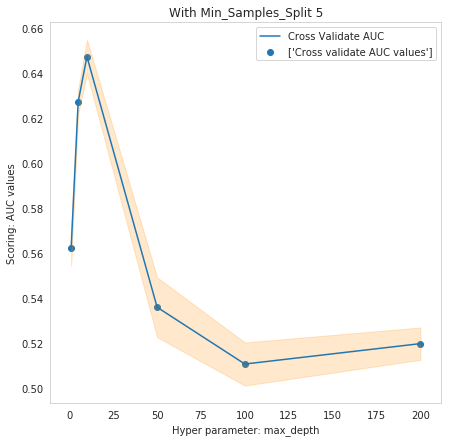

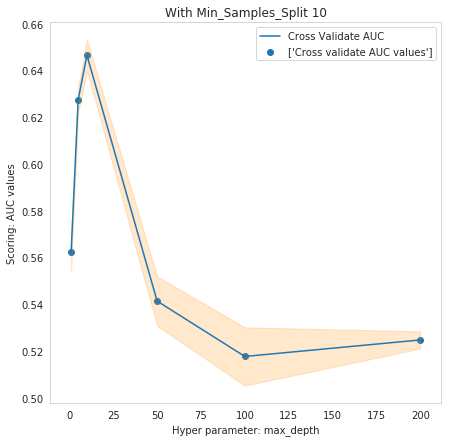

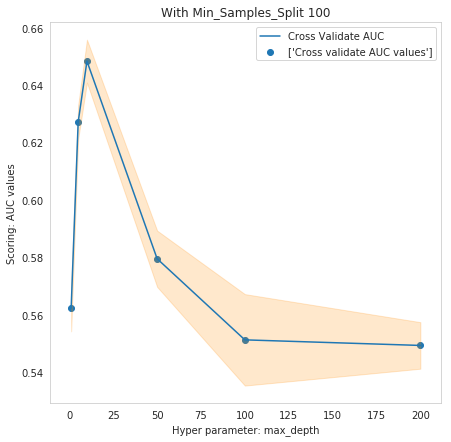

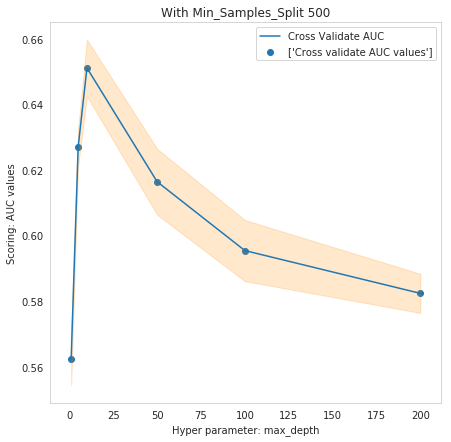

Word Cloud of Essays of False Positive Data: 


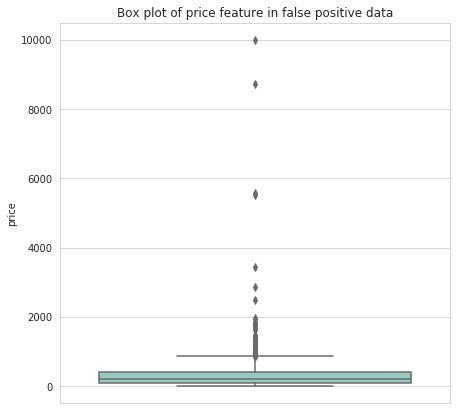

Results of analysis using Bag of words vectorized text features merged with other features using decision tree classifier: 
Optimal Max_Depth Value:  10
Optimal Min_Samples_Split Value:  500
AUC value of test data:  0.6130210524911783
Confusion Matrix : 


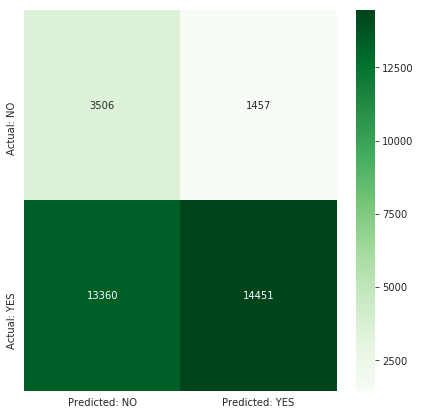

In [0]:
techniques = ['Bag of words'];
for index, technique in enumerate(techniques):
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    crossValidateMergedData = hstack((categoriesTransformedCrossValidateData,\
                                          subCategoriesTransformedCrossValidateData,\
                                          teacherPrefixTransformedCrossValidateData,\
                                          schoolStateTransformedCrossValidateData,\
                                          projectGradeTransformedCrossValidateData,\
                                          priceTransformedCrossValidateData,\
                                          previouslyPostedTransformedCrossValidateData));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     bowTitleModelSub,\
                                     bowEssayModelSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                 bowTitleTransformedCrossValidateData,\
                                 bowEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 bowTitleTransformedTestData,\
                                 bowEssayTransformedTestData));
    
    dtClassifier = tree.DecisionTreeClassifier(class_weight="balanced");
    tunedParameters = {'max_depth': [1, 5, 10, 50, 100, 200], 'min_samples_split': [5, 10, 100, 500]};    classifier = GridSearchCV(dtClassifier, tunedParameters, cv = 5, scoring = 'roc_auc');
    classifier.fit(trainingMergedData, classesTrainingSub);
    
    testScoresDataFrame = pd.DataFrame(data = np.hstack((classifier.cv_results_['param_max_depth'].data[:, None], classifier.cv_results_['param_min_samples_split'].data[:, None], classifier.cv_results_['mean_test_score'][:, None], classifier.cv_results_['std_test_score'][:, None])), columns = ['max_depth', 'min_samples_split', 'mts', 'stdts']);
    testScoresDataFrame = testScoresDataFrame.astype(float);
    
    crossValidateAucMeanValues = classifier.cv_results_['mean_test_score'];
    crossValidateAucStdValues = classifier.cv_results_['std_test_score'];
    
    for splitValue in tunedParameters['min_samples_split']:  
      plt.plot(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = "Cross Validate AUC");
      plt.scatter(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = ['Cross validate AUC values']);
      plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'].values, np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values - testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float),\
                             np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values + testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
      plt.xlabel('Hyper parameter: max_depth');
      plt.ylabel('Scoring: AUC values');
      plt.title("With Min_Samples_Split {}".format(splitValue));
      plt.grid();
      plt.legend();
      plt.show();
    
    
    optimalHypParamValue = classifier.best_params_['max_depth'];
    optimalHypParam2Value = classifier.best_params_['min_samples_split'];
    dtClassifier = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth = optimalHypParamValue, min_samples_split = optimalHypParam2Value);
    dtClassifier.fit(trainingMergedData, classesTrainingSub);
    predScoresTraining = dtClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predScoresTraining[:, 1]);
    predScoresTest = dtClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predScoresTest[:, 1]);
    predictionClassesTest = dtClassifier.predict(testMergedData);
    
    falsePositivePointsIndexes = [];
    for index, classValue in enumerate(classesTest):
      if(classValue == 0 and predictionClassesTest[index] == 1):
        falsePositivePointsIndexes.append(index);
    falsePositiveData = testData.iloc[falsePositivePointsIndexes]
    essayWords = '';
    for essay in falsePositiveData['preprocessed_essays'].values:
      essayWords = essayWords + " " + essay;
    equalsBorder(60);
    print("Word Cloud of Essays of False Positive Data: ");
    equalsBorder(50);
    wordCloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(essay);
    plt.figure(figsize = (8, 8), facecolor = None);
    plt.imshow(wordCloud);
    plt.axis('off');
    plt.tight_layout(pad= 0);
    plt.show();
    
    equalsBorder(90);
    sbrn.boxplot(falsePositiveData['price'], orient = 'v', palette = 'Set3').set_title('Box plot of price feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    sbrn.distplot(falsePositiveData['teacher_number_of_previously_posted_projects'], color = 'g').set_title('Pdf of previously posted feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    plt.plot(fprTrain, tprTrain, label = "Train AUC = " + str(auc(fprTrain, tprTrain)));
    plt.plot(fprTest, tprTest, label = "Test AUC = " + str(auc(fprTest, tprTest)));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.xlabel("fpr values");
    plt.ylabel("tpr values");
    plt.grid();
    plt.legend();
    plt.show();

    areaUnderRocValueTest = auc(fprTest, tprTest);

    print("Results of analysis using {} vectorized text features merged with other features using decision tree classifier: ".format(technique));
    equalsBorder(70);
    print("Optimal Max_Depth Value: ", optimalHypParamValue);
    equalsBorder(40);
    print("Optimal Min_Samples_Split Value: ", optimalHypParam2Value);
    equalsBorder(40);
    print("AUC value of test data: ", str(areaUnderRocValueTest));
    # Predicting classes of test data projects
    predictionClassesTest = dtClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd', cmap="Greens");
    plt.show();

<h3><font color="green">Classification using tf-idf vectorized data by decision trees</font></h3>

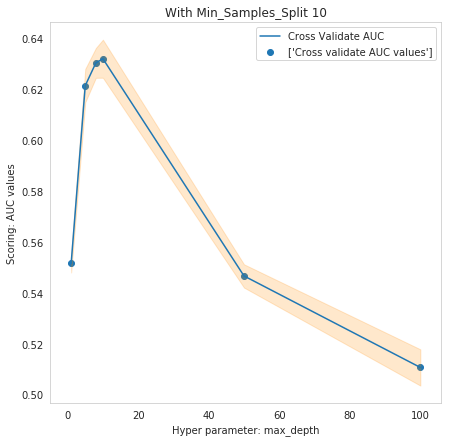

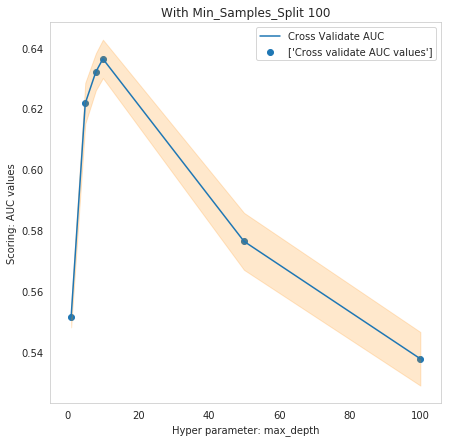

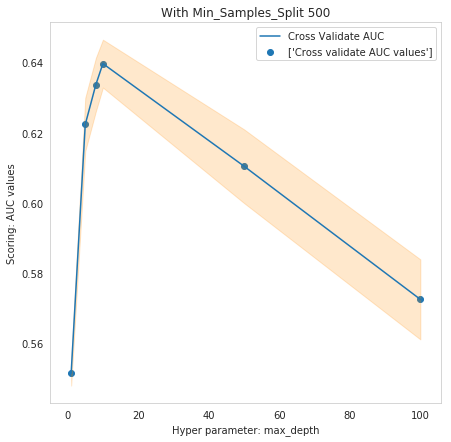

Word Cloud of Essays of False Positive Data: 


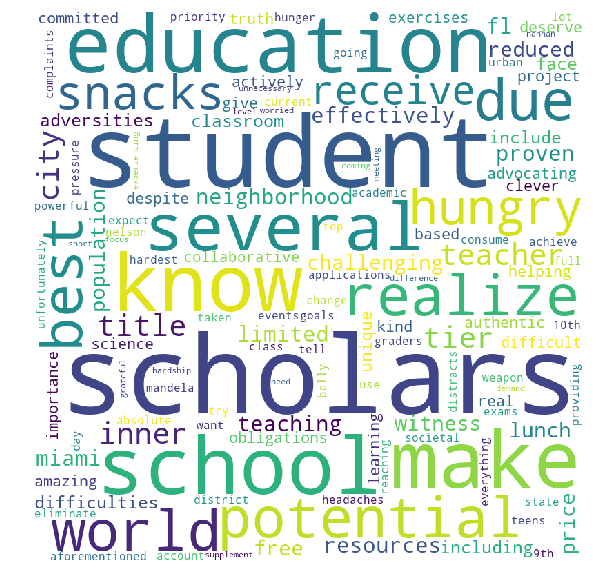

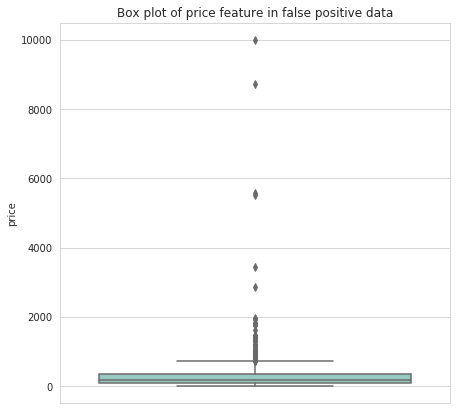

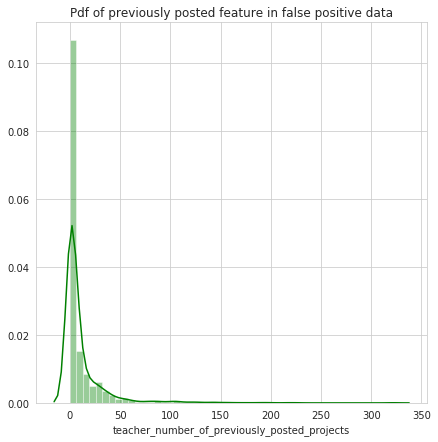

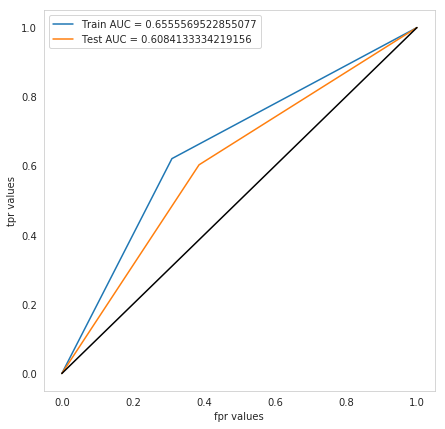

Results of analysis using Tf-Idf vectorized text features merged with other features using decision tree classifier: 
Optimal Max_Depth Value:  10
Optimal Min_Samples_Split Value:  500
AUC value of test data:  0.6084133334219156
Confusion Matrix : 


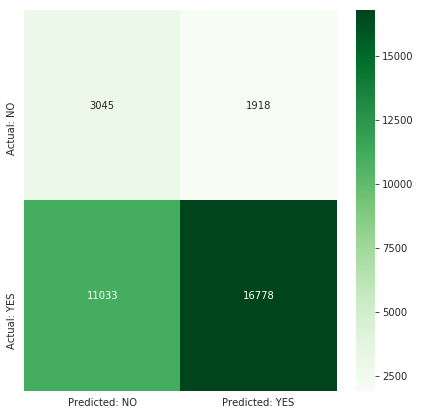

In [0]:
techniques = ['Tf-Idf'];
for index, technique in enumerate(techniques):
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    crossValidateMergedData = hstack((categoriesTransformedCrossValidateData,\
                                          subCategoriesTransformedCrossValidateData,\
                                          teacherPrefixTransformedCrossValidateData,\
                                          schoolStateTransformedCrossValidateData,\
                                          projectGradeTransformedCrossValidateData,\
                                          priceTransformedCrossValidateData,\
                                          previouslyPostedTransformedCrossValidateData));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfTitleModelSub,\
                                     tfIdfEssayModelSub));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                 tfIdfTitleTransformedCrossValidateData,\
                                 tfIdfEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 tfIdfTitleTransformedTestData,\
                                 tfIdfEssayTransformedTestData));
    
    dtClassifier = tree.DecisionTreeClassifier(class_weight="balanced");
    tunedParameters = {'max_depth': [1, 5, 8, 10, 50, 100], 'min_samples_split': [5, 10, 100, 500]};   
    classifier = GridSearchCV(dtClassifier, tunedParameters, cv = 5, scoring = 'roc_auc');
    classifier.fit(trainingMergedData, classesTrainingSub);
    
    testScoresDataFrame = pd.DataFrame(data = np.hstack((classifier.cv_results_['param_max_depth'].data[:, None], classifier.cv_results_['param_min_samples_split'].data[:, None], classifier.cv_results_['mean_test_score'][:, None], classifier.cv_results_['std_test_score'][:, None])), columns = ['max_depth', 'min_samples_split', 'mts', 'stdts']);
    testScoresDataFrame = testScoresDataFrame.astype(float);
    
    crossValidateAucMeanValues = classifier.cv_results_['mean_test_score'];
    crossValidateAucStdValues = classifier.cv_results_['std_test_score'];
    
    for splitValue in tunedParameters['min_samples_split']:  
      plt.plot(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = "Cross Validate AUC");
      plt.scatter(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = ['Cross validate AUC values']);
      plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'].values, np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values - testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float),\
                             np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values + testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
      plt.xlabel('Hyper parameter: max_depth');
      plt.ylabel('Scoring: AUC values');
      plt.title("With Min_Samples_Split {}".format(splitValue));
      plt.grid();
      plt.legend();
      plt.show();
    
    
    optimalHypParamValue = classifier.best_params_['max_depth'];
    optimalHypParam2Value = classifier.best_params_['min_samples_split'];
    dtClassifier = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth = optimalHypParamValue, min_samples_split = optimalHypParam2Value);
    dtClassifier.fit(trainingMergedData, classesTrainingSub);
    predScoresTraining = dtClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predScoresTraining[:, 1]);
    predScoresTest = dtClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predScoresTest[:, 1]);
    predictionClassesTest = dtClassifier.predict(testMergedData);
    
    falsePositivePointsIndexes = [];
    for index, classValue in enumerate(classesTest):
      if(classValue == 0 and predictionClassesTest[index] == 1):
        falsePositivePointsIndexes.append(index);
    falsePositiveData = testData.iloc[falsePositivePointsIndexes]
    essayWords = '';
    for essay in falsePositiveData['preprocessed_essays'].values:
      essayWords = essayWords + " " + essay;
    equalsBorder(60);
    print("Word Cloud of Essays of False Positive Data: ");
    equalsBorder(50);
    wordCloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(essay);
    plt.figure(figsize = (8, 8), facecolor = None);
    plt.imshow(wordCloud);
    plt.axis('off');
    plt.tight_layout(pad= 0);
    plt.show();
    
    equalsBorder(90);
    sbrn.boxplot(falsePositiveData['price'], orient = 'v', palette = 'Set3').set_title('Box plot of price feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    sbrn.distplot(falsePositiveData['teacher_number_of_previously_posted_projects'], color = 'g').set_title('Pdf of previously posted feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    plt.plot(fprTrain, tprTrain, label = "Train AUC = " + str(auc(fprTrain, tprTrain)));
    plt.plot(fprTest, tprTest, label = "Test AUC = " + str(auc(fprTest, tprTest)));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.xlabel("fpr values");
    plt.ylabel("tpr values");
    plt.grid();
    plt.legend();
    plt.show();

    areaUnderRocValueTest = auc(fprTest, tprTest);

    print("Results of analysis using {} vectorized text features merged with other features using decision tree classifier: ".format(technique));
    equalsBorder(70);
    print("Optimal Max_Depth Value: ", optimalHypParamValue);
    equalsBorder(40);
    print("Optimal Min_Samples_Split Value: ", optimalHypParam2Value);
    equalsBorder(40);
    print("AUC value of test data: ", str(areaUnderRocValueTest));
    # Predicting classes of test data projects
    predictionClassesTest = dtClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd', cmap="Greens");
    plt.show();

<h3><font color="green">Classification using word2vec vectorized data by decision trees</font></h3>

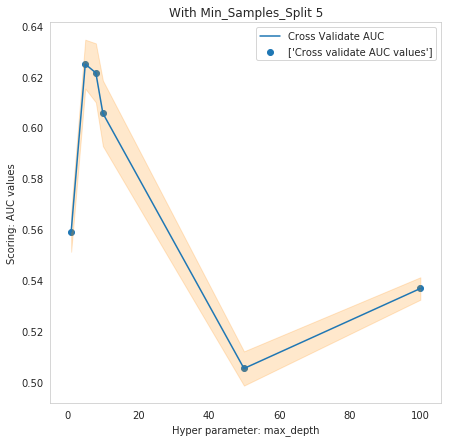

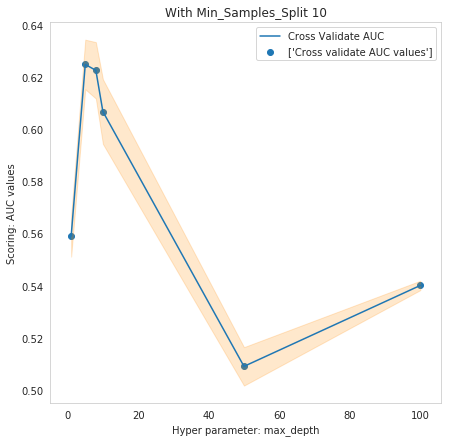

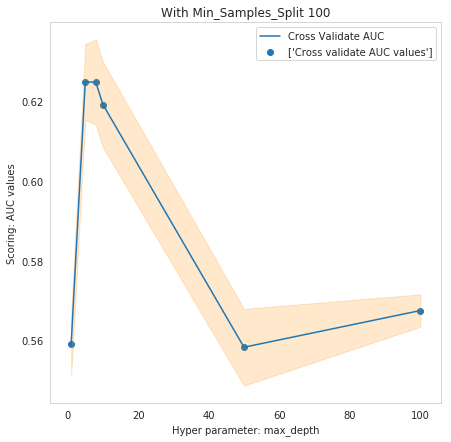

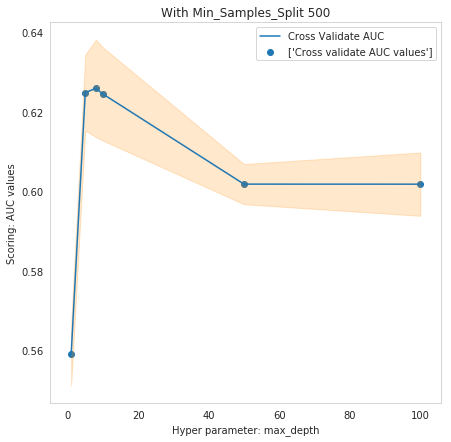

Word Cloud of Essays of False Positive Data: 


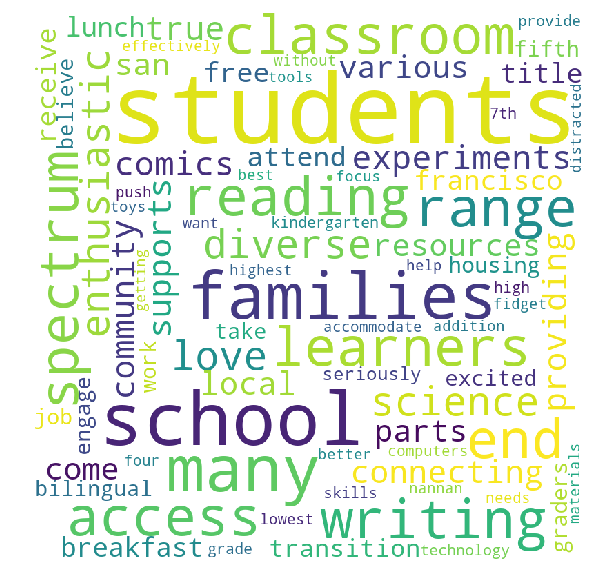

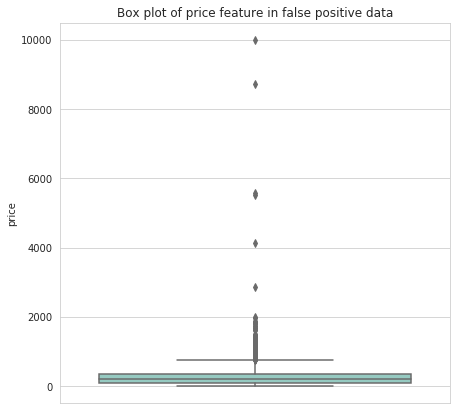

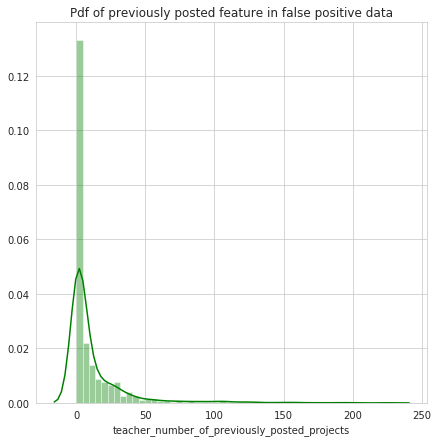

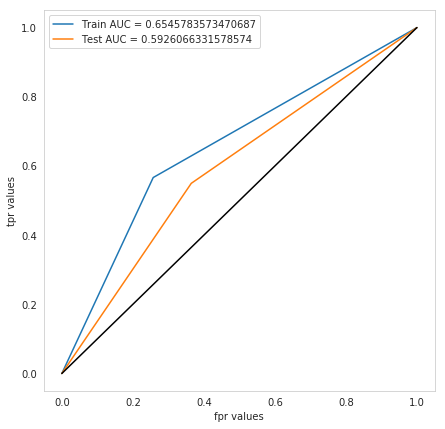

Results of analysis using Average Word2Vec vectorized text features merged with other features using decision tree classifier: 
Optimal Max_Depth Value:  8
Optimal Min_Samples_Split Value:  500
AUC value of test data:  0.5926066331578574
Confusion Matrix : 


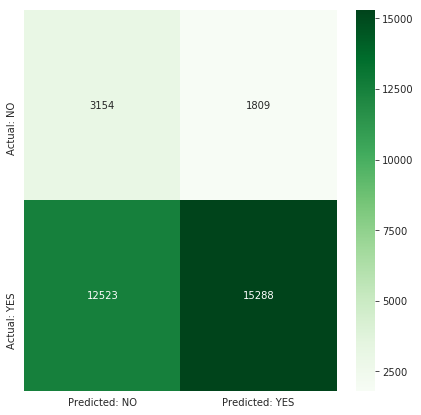

In [0]:
techniques = ['Average Word2Vec'];
for index, technique in enumerate(techniques):
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    crossValidateMergedData = hstack((categoriesTransformedCrossValidateData,\
                                          subCategoriesTransformedCrossValidateData,\
                                          teacherPrefixTransformedCrossValidateData,\
                                          schoolStateTransformedCrossValidateData,\
                                          projectGradeTransformedCrossValidateData,\
                                          priceTransformedCrossValidateData,\
                                          previouslyPostedTransformedCrossValidateData));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     word2VecTitlesVectors,\
                                     word2VecEssaysVectors));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                 avgWord2VecTitleTransformedCrossValidateData,\
                                 avgWord2VecEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 avgWord2VecTitleTransformedTestData,\
                                 avgWord2VecEssayTransformedTestData));
    
    dtClassifier = tree.DecisionTreeClassifier(class_weight="balanced");
    tunedParameters = {'max_depth': [1, 5, 8, 10, 50, 100], 'min_samples_split': [5, 10, 100, 500]};    classifier = GridSearchCV(dtClassifier, tunedParameters, cv = 5, scoring = 'roc_auc');
    classifier.fit(trainingMergedData, classesTrainingSub);
    
    testScoresDataFrame = pd.DataFrame(data = np.hstack((classifier.cv_results_['param_max_depth'].data[:, None], classifier.cv_results_['param_min_samples_split'].data[:, None], classifier.cv_results_['mean_test_score'][:, None], classifier.cv_results_['std_test_score'][:, None])), columns = ['max_depth', 'min_samples_split', 'mts', 'stdts']);
    testScoresDataFrame = testScoresDataFrame.astype(float);
    
    crossValidateAucMeanValues = classifier.cv_results_['mean_test_score'];
    crossValidateAucStdValues = classifier.cv_results_['std_test_score'];
    
    for splitValue in tunedParameters['min_samples_split']:  
      plt.plot(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = "Cross Validate AUC");
      plt.scatter(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = ['Cross validate AUC values']);
      plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'].values, np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values - testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float),\
                             np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values + testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
      plt.xlabel('Hyper parameter: max_depth');
      plt.ylabel('Scoring: AUC values');
      plt.title("With Min_Samples_Split {}".format(splitValue));
      plt.grid();
      plt.legend();
      plt.show();
    
    
    optimalHypParamValue = classifier.best_params_['max_depth'];
    optimalHypParam2Value = classifier.best_params_['min_samples_split'];
    dtClassifier = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth = optimalHypParamValue, min_samples_split = optimalHypParam2Value);
    dtClassifier.fit(trainingMergedData, classesTrainingSub);
    predScoresTraining = dtClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predScoresTraining[:, 1]);
    predScoresTest = dtClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predScoresTest[:, 1]);
    predictionClassesTest = dtClassifier.predict(testMergedData);
    
    falsePositivePointsIndexes = [];
    for index, classValue in enumerate(classesTest):
      if(classValue == 0 and predictionClassesTest[index] == 1):
        falsePositivePointsIndexes.append(index);
    falsePositiveData = testData.iloc[falsePositivePointsIndexes]
    essayWords = '';
    for essay in falsePositiveData['preprocessed_essays'].values:
      essayWords = essayWords + " " + essay;
    equalsBorder(60);
    print("Word Cloud of Essays of False Positive Data: ");
    equalsBorder(50);
    wordCloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(essay);
    plt.figure(figsize = (8, 8), facecolor = None);
    plt.imshow(wordCloud);
    plt.axis('off');
    plt.tight_layout(pad= 0);
    plt.show();
    
    equalsBorder(90);
    sbrn.boxplot(falsePositiveData['price'], orient = 'v', palette = 'Set3').set_title('Box plot of price feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    sbrn.distplot(falsePositiveData['teacher_number_of_previously_posted_projects'], color = 'g').set_title('Pdf of previously posted feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    plt.plot(fprTrain, tprTrain, label = "Train AUC = " + str(auc(fprTrain, tprTrain)));
    plt.plot(fprTest, tprTest, label = "Test AUC = " + str(auc(fprTest, tprTest)));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.xlabel("fpr values");
    plt.ylabel("tpr values");
    plt.grid();
    plt.legend();
    plt.show();

    areaUnderRocValueTest = auc(fprTest, tprTest);

    print("Results of analysis using {} vectorized text features merged with other features using decision tree classifier: ".format(technique));
    equalsBorder(70);
    print("Optimal Max_Depth Value: ", optimalHypParamValue);
    equalsBorder(40);
    print("Optimal Min_Samples_Split Value: ", optimalHypParam2Value);
    equalsBorder(40);
    print("AUC value of test data: ", str(areaUnderRocValueTest));
    # Predicting classes of test data projects
    predictionClassesTest = dtClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd', cmap="Greens");
    plt.show();

<h3><font color="green">Classification using tf-idf weighted word2vec vectorized data by decision trees</font></h3>

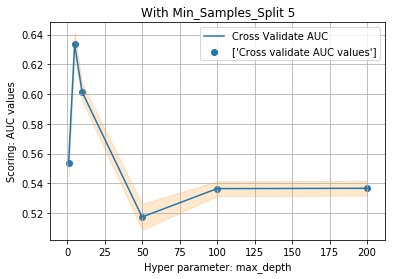

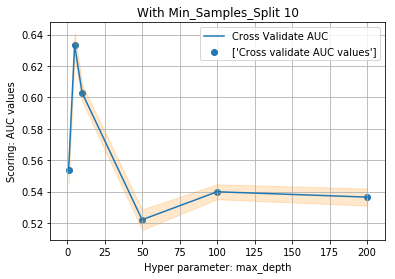

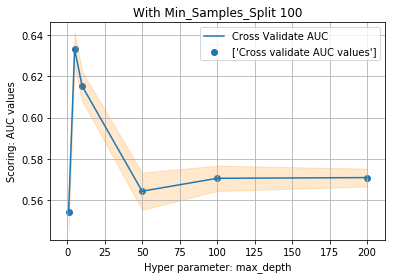

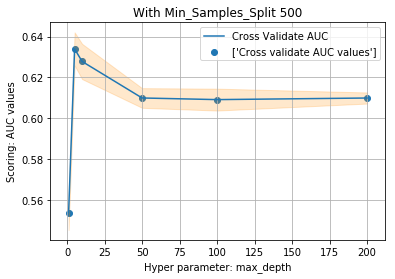

Word Cloud of Essays of False Positive Data: 


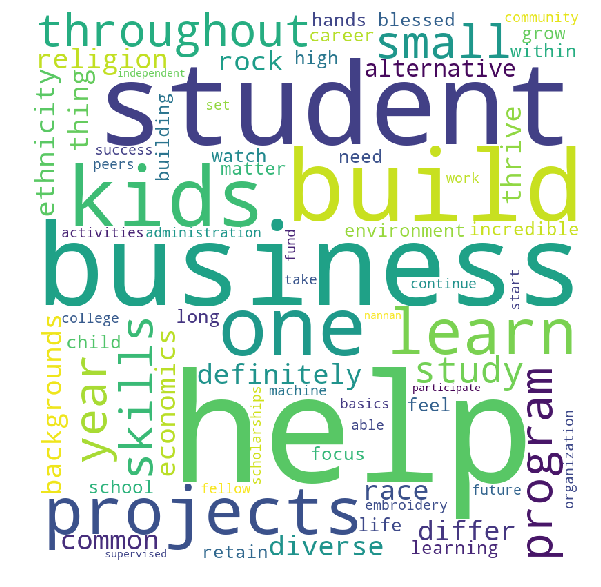

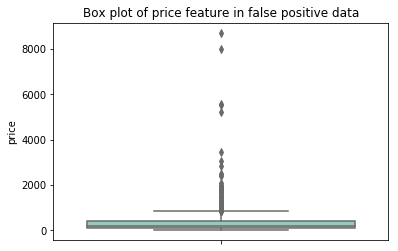

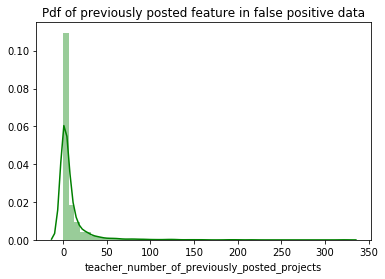

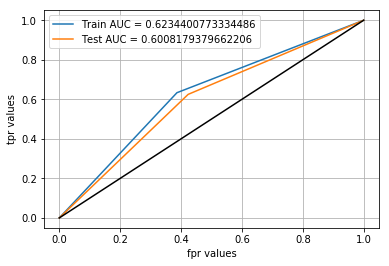

Results of analysis using Tf-Idf Weighted Word2Vec vectorized text features merged with other features using decision tree classifier: 
Optimal Max_Depth Value:  5
Optimal Min_Samples_Split Value:  500
AUC value of test data:  0.6008179379662206
Confusion Matrix : 


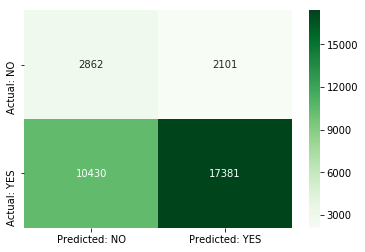

In [0]:
techniques = ['Tf-Idf Weighted Word2Vec'];
for index, technique in enumerate(techniques):
    trainingMergedData = hstack((categoriesVectorsSub,\
                                     subCategoriesVectorsSub,\
                                     teacherPrefixVectorsSub,\
                                     schoolStateVectorsSub,\
                                     projectGradeVectorsSub,\
                                     priceStandardizedSub,\
                                     previouslyPostedStandardizedSub));
    crossValidateMergedData = hstack((categoriesTransformedCrossValidateData,\
                                          subCategoriesTransformedCrossValidateData,\
                                          teacherPrefixTransformedCrossValidateData,\
                                          schoolStateTransformedCrossValidateData,\
                                          projectGradeTransformedCrossValidateData,\
                                          priceTransformedCrossValidateData,\
                                          previouslyPostedTransformedCrossValidateData));
    testMergedData = hstack((categoriesTransformedTestData,\
                                          subCategoriesTransformedTestData,\
                                          teacherPrefixTransformedTestData,\
                                          schoolStateTransformedTestData,\
                                          projectGradeTransformedTestData,\
                                          priceTransformedTestData,\
                                          previouslyPostedTransformedTestData));
    if(index == 0):
        trainingMergedData = hstack((trainingMergedData,\
                                     tfIdfWeightedWord2VecTitlesVectors,\
                                     tfIdfWeightedWord2VecEssaysVectors));
        crossValidateMergedData = hstack((crossValidateMergedData,\
                                 tfIdfWeightedWord2VecTitleTransformedCrossValidateData,\
                                 tfIdfWeightedWord2VecEssayTransformedCrossValidateData));
        testMergedData = hstack((testMergedData,\
                                 tfIdfWeightedWord2VecTitleTransformedTestData,\
                                 tfIdfWeightedWord2VecEssayTransformedTestData));
    
    dtClassifier = tree.DecisionTreeClassifier(class_weight="balanced");
    tunedParameters = {'max_depth': [1, 5, 10, 50, 100, 200], 'min_samples_split': [5, 10, 100, 500]};    classifier = GridSearchCV(dtClassifier, tunedParameters, cv = 5, scoring = 'roc_auc');
    classifier.fit(trainingMergedData, classesTrainingSub);
    
    testScoresDataFrame = pd.DataFrame(data = np.hstack((classifier.cv_results_['param_max_depth'].data[:, None], classifier.cv_results_['param_min_samples_split'].data[:, None], classifier.cv_results_['mean_test_score'][:, None], classifier.cv_results_['std_test_score'][:, None])), columns = ['max_depth', 'min_samples_split', 'mts', 'stdts']);
    testScoresDataFrame = testScoresDataFrame.astype(float);
    
    crossValidateAucMeanValues = classifier.cv_results_['mean_test_score'];
    crossValidateAucStdValues = classifier.cv_results_['std_test_score'];
    
    for splitValue in tunedParameters['min_samples_split']:  
      plt.plot(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = "Cross Validate AUC");
      plt.scatter(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = ['Cross validate AUC values']);
      plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'].values, np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values - testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float),\
                             np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values + testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
      plt.xlabel('Hyper parameter: max_depth');
      plt.ylabel('Scoring: AUC values');
      plt.title("With Min_Samples_Split {}".format(splitValue));
      plt.grid();
      plt.legend();
      plt.show();
    
    
    optimalHypParamValue = classifier.best_params_['max_depth'];
    optimalHypParam2Value = classifier.best_params_['min_samples_split'];
    dtClassifier = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth = optimalHypParamValue, min_samples_split = optimalHypParam2Value);
    dtClassifier.fit(trainingMergedData, classesTrainingSub);
    predScoresTraining = dtClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predScoresTraining[:, 1]);
    predScoresTest = dtClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predScoresTest[:, 1]);
    predictionClassesTest = dtClassifier.predict(testMergedData);
    
    falsePositivePointsIndexes = [];
    for index, classValue in enumerate(classesTest):
      if(classValue == 0 and predictionClassesTest[index] == 1):
        falsePositivePointsIndexes.append(index);
    falsePositiveData = testData.iloc[falsePositivePointsIndexes]
    essayWords = '';
    for essay in falsePositiveData['preprocessed_essays'].values:
      essayWords = essayWords + " " + essay;
    equalsBorder(60);
    print("Word Cloud of Essays of False Positive Data: ");
    equalsBorder(50);
    wordCloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(essay);
    plt.figure(figsize = (8, 8), facecolor = None);
    plt.imshow(wordCloud);
    plt.axis('off');
    plt.tight_layout(pad= 0);
    plt.show();
    
    equalsBorder(90);
    sbrn.boxplot(falsePositiveData['price'], orient = 'v', palette = 'Set3').set_title('Box plot of price feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    sbrn.distplot(falsePositiveData['teacher_number_of_previously_posted_projects'], color = 'g').set_title('Pdf of previously posted feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    plt.plot(fprTrain, tprTrain, label = "Train AUC = " + str(auc(fprTrain, tprTrain)));
    plt.plot(fprTest, tprTest, label = "Test AUC = " + str(auc(fprTest, tprTest)));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.xlabel("fpr values");
    plt.ylabel("tpr values");
    plt.grid();
    plt.legend();
    plt.show();

    areaUnderRocValueTest = auc(fprTest, tprTest);

    print("Results of analysis using {} vectorized text features merged with other features using decision tree classifier: ".format(technique));
    equalsBorder(70);
    print("Optimal Max_Depth Value: ", optimalHypParamValue);
    equalsBorder(40);
    print("Optimal Min_Samples_Split Value: ", optimalHypParam2Value);
    equalsBorder(40);
    print("AUC value of test data: ", str(areaUnderRocValueTest));
    # Predicting classes of test data projects
    predictionClassesTest = dtClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd', cmap="Greens");
    plt.show();

<h3><font color="green">Classification using tf-idf vectorized data containing top 5k features by decision trees</font></h3>

In [93]:
featureImportances = np.array(dtClassifier.feature_importances_)
importantFeaturesIndices = np.argsort(featureImportances)[::-1];
importantFeaturesIndices

array([  99, 5038,  100, ..., 4783, 4784,    0])

In [94]:
print(featureImportances[99]);
print(featureImportances[5038]);

0.16196861971238172
0.10121099256606561


In [0]:
importantFeaturesIndicesTop5k = importantFeaturesIndices[0:5000];

In [0]:
trainingMergedData = trainingMergedData.tocsr();
trainingMergedData = trainingMergedData[:, importantFeaturesIndicesTop5k]
crossValidateMergedData = crossValidateMergedData.tocsr();
crossValidateMergedData = crossValidateMergedData[:, importantFeaturesIndicesTop5k]
testMergedData = testMergedData.tocsr();
testMergedData = testMergedData[:, importantFeaturesIndicesTop5k]

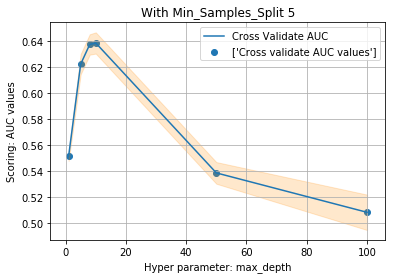

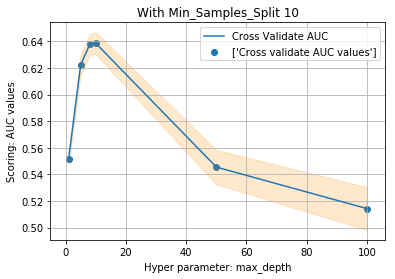

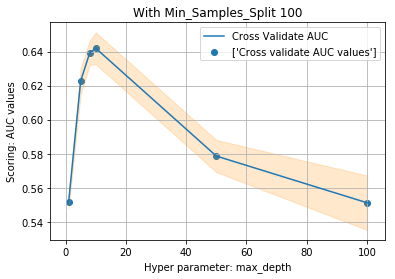

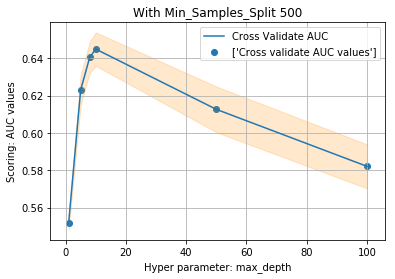

Word Cloud of Essays of False Positive Data: 


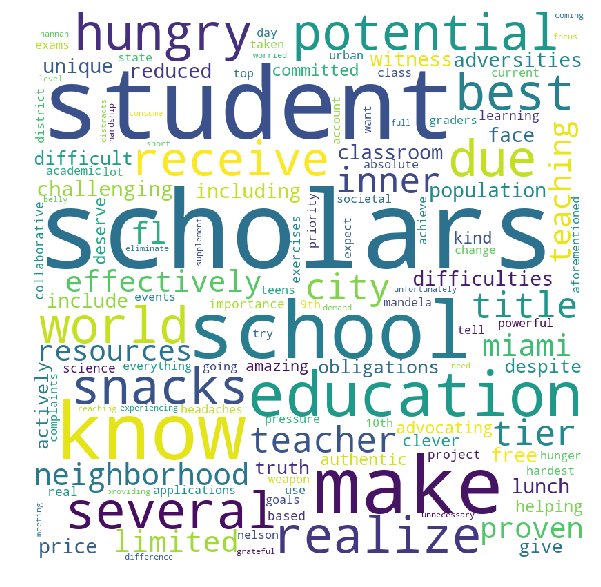

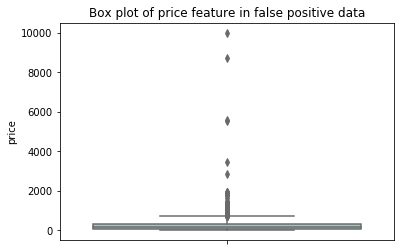

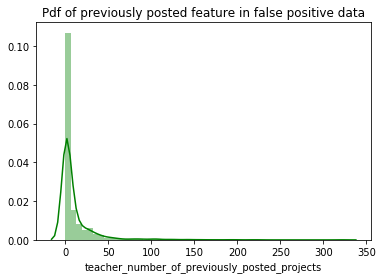

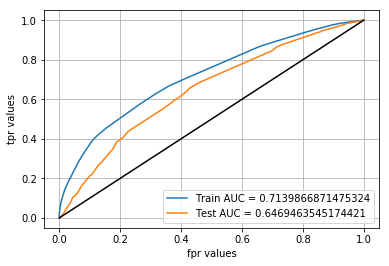

Results of analysis using Tf-Idf(With reduced features) vectorized text features merged with other features using decision tree classifier: 
Optimal Max_Depth Value:  10
Optimal Min_Samples_Split Value:  500
AUC value of test data:  0.6469463545174421
Confusion Matrix : 


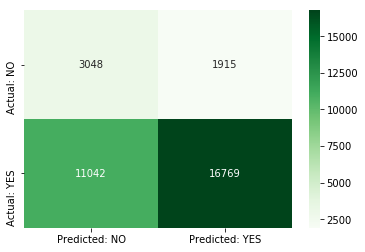

In [106]:
techniques = ['Tf-Idf(With reduced features)'];
for index, technique in enumerate(techniques):
    dtClassifier = tree.DecisionTreeClassifier(class_weight='balanced');
    tunedParameters = {'max_depth': [1, 5, 8, 10, 50, 100], 'min_samples_split': [5, 10, 100, 500]};   
    classifier = GridSearchCV(dtClassifier, tunedParameters, cv = 5, scoring = 'roc_auc');
    classifier.fit(trainingMergedData, classesTrainingSub);
    
    testScoresDataFrame = pd.DataFrame(data = np.hstack((classifier.cv_results_['param_max_depth'].data[:, None], classifier.cv_results_['param_min_samples_split'].data[:, None], classifier.cv_results_['mean_test_score'][:, None], classifier.cv_results_['std_test_score'][:, None])), columns = ['max_depth', 'min_samples_split', 'mts', 'stdts']);
    testScoresDataFrame = testScoresDataFrame.astype(float);
    
    crossValidateAucMeanValues = classifier.cv_results_['mean_test_score'];
    crossValidateAucStdValues = classifier.cv_results_['std_test_score'];
    
    for splitValue in tunedParameters['min_samples_split']:  
      plt.plot(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = "Cross Validate AUC");
      plt.scatter(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'], testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'], label = ['Cross validate AUC values']);
      plt.gca().fill_between(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['max_depth'].values, np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values - testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float),\
                             np.array(testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['mts'].values + testScoresDataFrame[testScoresDataFrame['min_samples_split'] == splitValue]['stdts'].values, dtype = float), alpha = 0.2, color = 'darkorange');
      plt.xlabel('Hyper parameter: max_depth');
      plt.ylabel('Scoring: AUC values');
      plt.title("With Min_Samples_Split {}".format(splitValue));
      plt.grid();
      plt.legend();
      plt.show();
    
    
    optimalHypParamValue = classifier.best_params_['max_depth'];
    optimalHypParam2Value = classifier.best_params_['min_samples_split'];
    dtClassifier = tree.DecisionTreeClassifier(class_weight = 'balanced', max_depth = optimalHypParamValue, min_samples_split = optimalHypParam2Value);
    dtClassifier.fit(trainingMergedData, classesTrainingSub);
    predScoresTraining = dtClassifier.predict_proba(trainingMergedData);
    fprTrain, tprTrain, thresholdTrain = roc_curve(classesTraining, predScoresTraining[:, 1]);
    predScoresTest = dtClassifier.predict_proba(testMergedData);
    fprTest, tprTest, thresholdTest = roc_curve(classesTest, predScoresTest[:, 1]);
    predictionClassesTest = dtClassifier.predict(testMergedData);
    
    falsePositivePointsIndexes = [];
    for index, classValue in enumerate(classesTest):
      if(classValue == 0 and predictionClassesTest[index] == 1):
        falsePositivePointsIndexes.append(index);
    falsePositiveData = testData.iloc[falsePositivePointsIndexes]
    essayWords = '';
    for essay in falsePositiveData['preprocessed_essays'].values:
      essayWords = essayWords + " " + essay;
    equalsBorder(60);
    print("Word Cloud of Essays of False Positive Data: ");
    equalsBorder(50);
    wordCloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(essay);
    plt.figure(figsize = (8, 8), facecolor = None);
    plt.imshow(wordCloud);
    plt.axis('off');
    plt.tight_layout(pad= 0);
    plt.show();
    
    equalsBorder(90);
    sbrn.boxplot(falsePositiveData['price'], orient = 'v', palette = 'Set3').set_title('Box plot of price feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    sbrn.distplot(falsePositiveData['teacher_number_of_previously_posted_projects'], color = 'g').set_title('Pdf of previously posted feature in false positive data');
    plt.show();
    
    equalsBorder(70);
    plt.plot(fprTrain, tprTrain, label = "Train AUC = " + str(auc(fprTrain, tprTrain)));
    plt.plot(fprTest, tprTest, label = "Test AUC = " + str(auc(fprTest, tprTest)));
    plt.plot([0, 1], [0, 1], 'k-');
    plt.xlabel("fpr values");
    plt.ylabel("tpr values");
    plt.grid();
    plt.legend();
    plt.show();

    areaUnderRocValueTest = auc(fprTest, tprTest);

    print("Results of analysis using {} vectorized text features merged with other features using decision tree classifier: ".format(technique));
    equalsBorder(70);
    print("Optimal Max_Depth Value: ", optimalHypParamValue);
    equalsBorder(40);
    print("Optimal Min_Samples_Split Value: ", optimalHypParam2Value);
    equalsBorder(40);
    print("AUC value of test data: ", str(areaUnderRocValueTest));
    # Predicting classes of test data projects
    predictionClassesTest = dtClassifier.predict(testMergedData);
    equalsBorder(40);
    # Printing confusion matrix
    confusionMatrix = confusion_matrix(classesTest, predictionClassesTest);
    # Creating dataframe for generated confusion matrix
    confusionMatrixDataFrame = pd.DataFrame(data = confusionMatrix, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES']);
    print("Confusion Matrix : ");
    equalsBorder(60);
    sbrn.heatmap(confusionMatrixDataFrame, annot = True, fmt = 'd', cmap="Greens");
    plt.show();

<a id="classification_using_support_vector_machine_results"></a>
<h3><font color="green">Summary of results of above classification using decision trees</font></h3>

In [24]:
techniques = ['Bag of words', 'Tf-Idf', 'Average Word2Vec', 'Tf-Idf Weighted Word2Vec', 'Tf-Idf(data with less features)'];
aucValues = [0.6130, 0.6484, 0.5926, 0.6008, 0.6469]
maxDepthValues = [10, 10, 8, 5, 10]
minSamplesSplitValues = [500, 500, 500, 500, 500]
for i,technique in enumerate(techniques):
    decisionTreeResultsDataFrame = decisionTreeResultsDataFrame.append({'Vectorizer': technique, 'Model': 'DecisionTrees', 'Max_Depth': maxDepthValues[i], 'Min_Samples_Split': minSamplesSplitValues[i], 'AUC': aucValues[i]}, ignore_index = True);
decisionTreeResultsDataFrame

Vectorizer          Model     AUC  Max_Depth  \
0                     Bag of words  DecisionTrees  0.6130       10.0   
1                           Tf-Idf  DecisionTrees  0.6484       10.0   
2                 Average Word2Vec  DecisionTrees  0.5926        8.0   
3         Tf-Idf Weighted Word2Vec  DecisionTrees  0.6008        5.0   
4  Tf-Idf(data with less features)  DecisionTrees  0.6469       10.0   

   Min_Samples_Split  
0              500.0  
1              500.0  
2              500.0  
3              500.0  
4              500.0

<a id="classification_using_support_vector_machine_conclusions"></a>
<h3><font color="green">Conclusions of above analysis</font></h3>

1. It seems like by seeing above results table the model builded using data containing tf-idf vectorized text would be best as it is giving best auc value among others.
2. The model trained with data containing less features is also giving good auc value with just little difference and so it is best to use this combination as it takes less time for training.
3. The best depth and samples split value would be 10 and 500.
4. Most of the models trained with data using various vectorization techniques have same fault like they are all predicting most of the 'yes' values as 'no'.
5. The essays of data points with actual classes as 'no' but predicted as 'yes' contains words like students, families, resources etc... So using these words in essay would increase probability of predicting the proposal as yes.